In [1]:
import folium
import pandas as pd
import plotly.express as px
import chart_studio.plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.io
import matplotlib.pyplot as plt
init_notebook_mode()
%matplotlib inline


In [2]:
dados_completos = pd.read_csv("dados/brazil_covid19.csv")
dados_completos = dados_completos.drop(columns=["region", "deaths"])

datas_corretas =  []
# muda o formato da data de ano-mes-dia para dia-mes-ano
for date in dados_completos["date"]:
  ano = date[:4]
  mes = date[5:7]
  dia = date[8:]
  datas_corretas.append(dia + "-" + mes + "-" + ano)

dados_completos["date"] = datas_corretas # coloca novo formato de data no dataset




In [3]:
dados_completos.columns = ["data","estado","casos"]
dados_completos

data estado    casos
0     25-02-2020     DF        0
1     25-02-2020     GO        0
2     25-02-2020     MS        0
3     25-02-2020     MT        0
4     25-02-2020     AL        0
...          ...    ...      ...
7393  24-11-2020     RJ   340833
7394  24-11-2020     SP  1215844
7395  24-11-2020     PR   261018
7396  24-11-2020     RS   301766
7397  24-11-2020     SC   332076

[7398 rows x 3 columns]

In [11]:
#geo_data = "/home/ctxo/Documents/Projeto\ Completo/dados/brazil-states.geojson"
geo_data = "dados/brazil-states.geojson"

key_on = "properties.sigla"

color_scale = [[0, "rgb(255,255,255)"]]
for n in range(1,51):
    color_scale.append([n/100, f"rgb(255,{int(255*(50-n)/50)},{int(255*(50-n)/50)})"])

for n in range(51,101):
    color_scale.append([n/100, f"rgb({int(255*(100-n)/50)}, 0, 0)"])
color_scale

[[0, 'rgb(255,255,255)'],
 [0.01, 'rgb(255,249,249)'],
 [0.02, 'rgb(255,244,244)'],
 [0.03, 'rgb(255,239,239)'],
 [0.04, 'rgb(255,234,234)'],
 [0.05, 'rgb(255,229,229)'],
 [0.06, 'rgb(255,224,224)'],
 [0.07, 'rgb(255,219,219)'],
 [0.08, 'rgb(255,214,214)'],
 [0.09, 'rgb(255,209,209)'],
 [0.1, 'rgb(255,204,204)'],
 [0.11, 'rgb(255,198,198)'],
 [0.12, 'rgb(255,193,193)'],
 [0.13, 'rgb(255,188,188)'],
 [0.14, 'rgb(255,183,183)'],
 [0.15, 'rgb(255,178,178)'],
 [0.16, 'rgb(255,173,173)'],
 [0.17, 'rgb(255,168,168)'],
 [0.18, 'rgb(255,163,163)'],
 [0.19, 'rgb(255,158,158)'],
 [0.2, 'rgb(255,153,153)'],
 [0.21, 'rgb(255,147,147)'],
 [0.22, 'rgb(255,142,142)'],
 [0.23, 'rgb(255,137,137)'],
 [0.24, 'rgb(255,132,132)'],
 [0.25, 'rgb(255,127,127)'],
 [0.26, 'rgb(255,122,122)'],
 [0.27, 'rgb(255,117,117)'],
 [0.28, 'rgb(255,112,112)'],
 [0.29, 'rgb(255,107,107)'],
 [0.3, 'rgb(255,102,102)'],
 [0.31, 'rgb(255,96,96)'],
 [0.32, 'rgb(255,91,91)'],
 [0.33, 'rgb(255,86,86)'],
 [0.34, 'rgb(255,81,81)'],

In [5]:

def gera_mapa(dados,dia):
    '''Cria um mapa coroplético do Brasil a partir de um Data Frame do pandas'''
    data = dict(type='choropleth',
                locations = dados["estado"],
                geojson = geo_data,
                colorscale = color_scale,
                #text = df['state'],
                z = dados['casos'],
                featureidkey="properties.sigla",
                zmin=0, zmax=  1215844,

                colorbar = dict(
                title="Casos",
                titleside="top",
                tickmode="array",
                ticks="outside")
                )
    layout = dict(title = f'Dia {dia}',
                  geo = dict(scope='south america'),
                 )

    fig = go.Figure(data = [data],layout = layout)
    fig.update_geos(fitbounds="geojson", visible=False)
    fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=50,
        pad=0)
    )
    

    return fig




/home/ctxo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



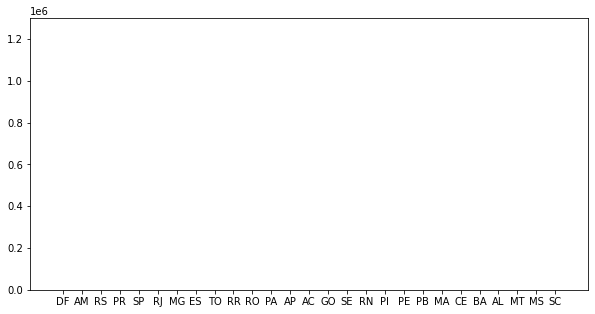

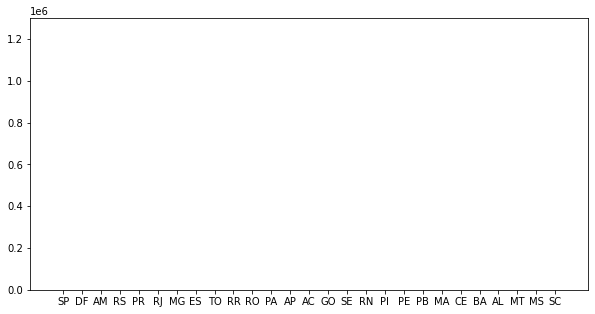

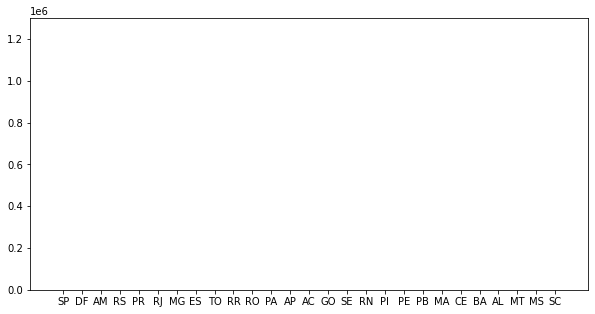

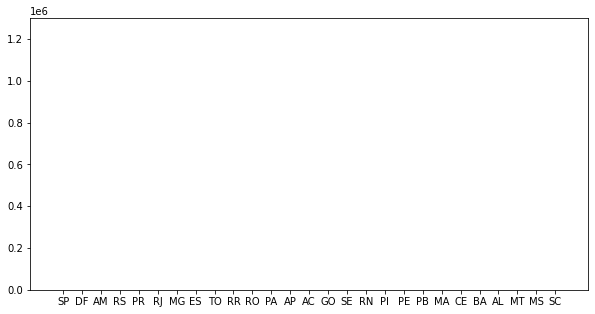

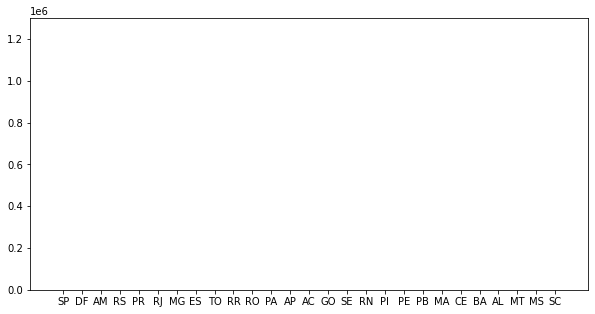

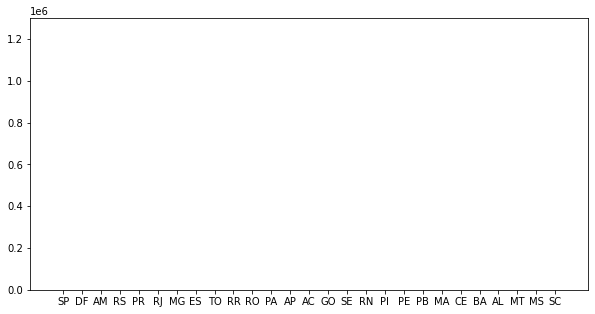

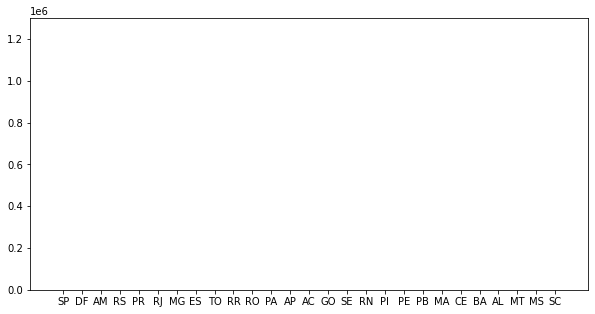

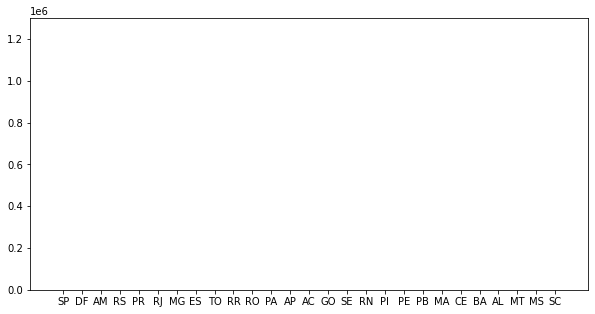

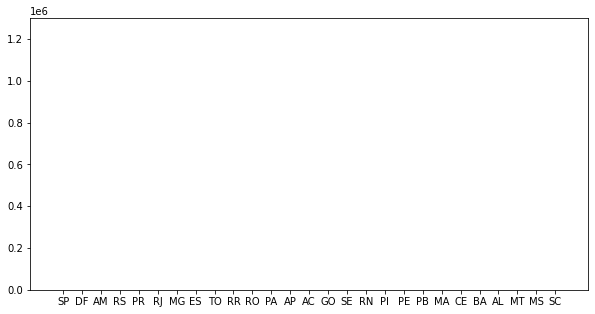

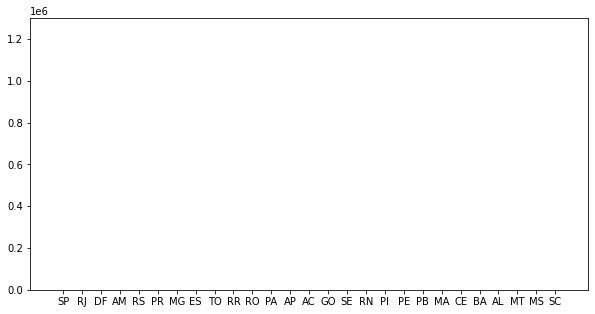

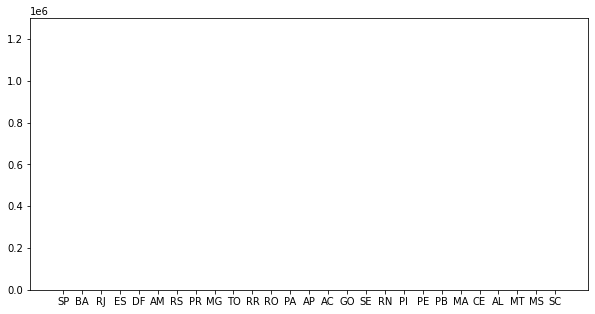

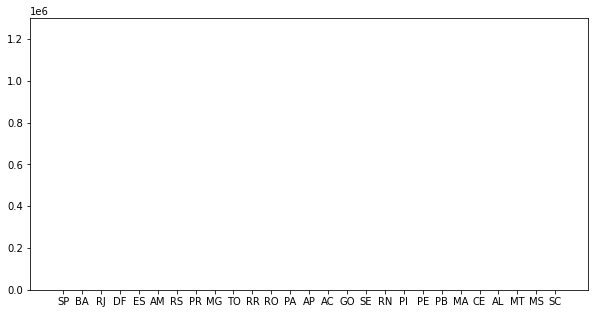

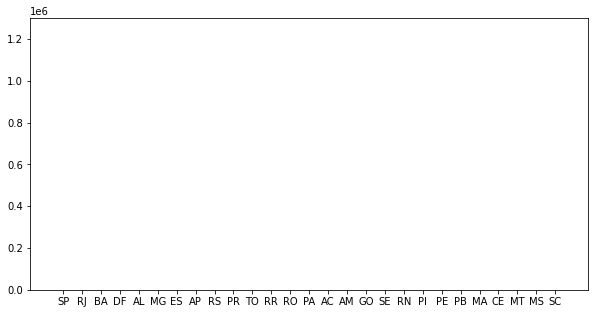

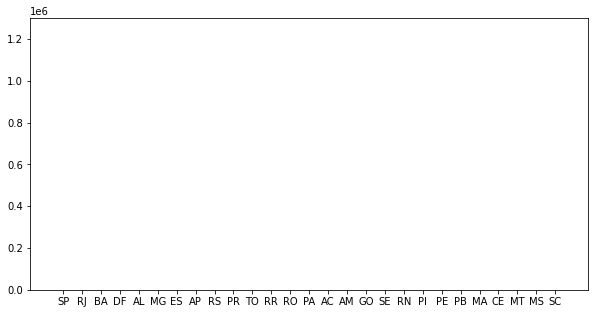

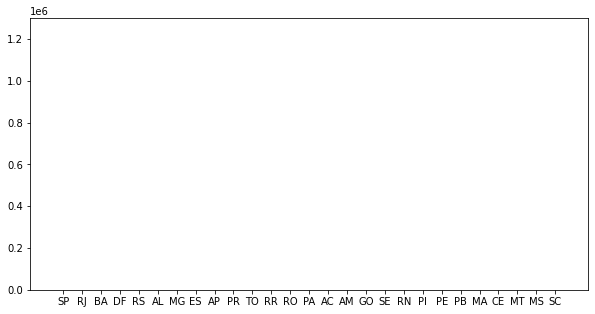

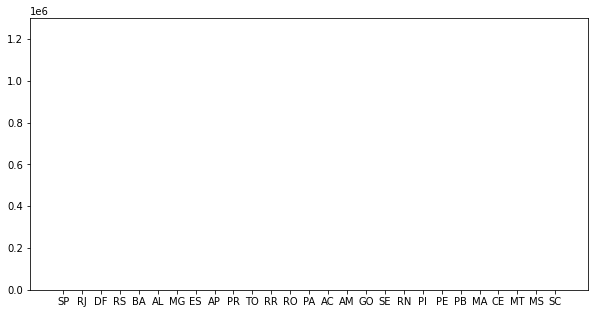

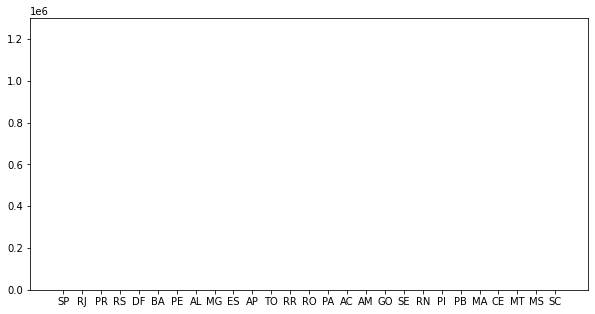

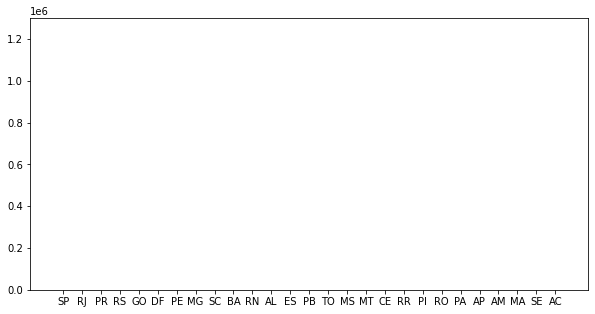

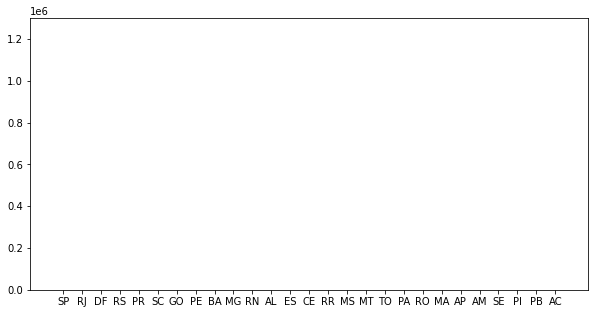

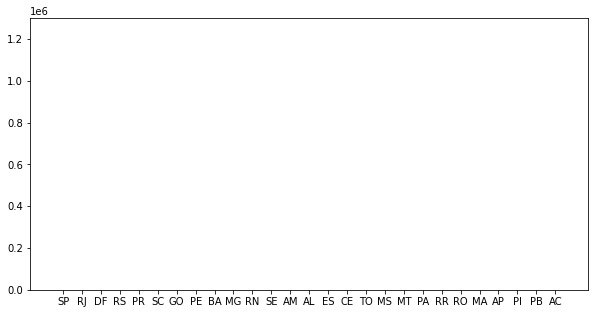

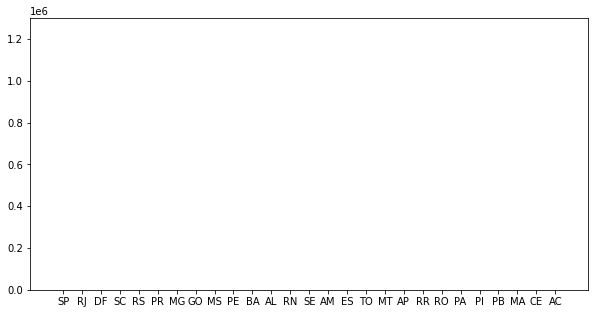

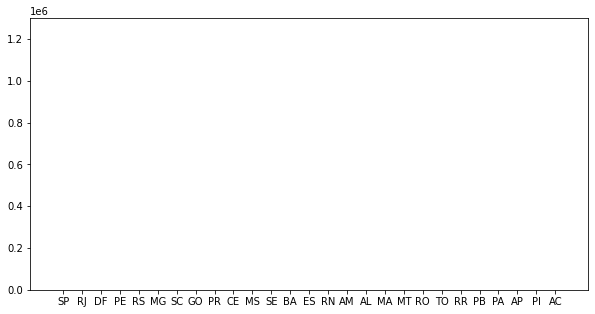

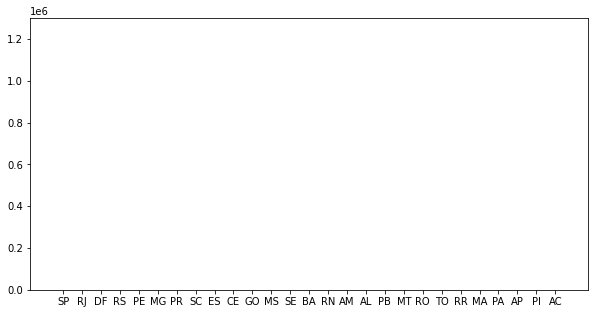

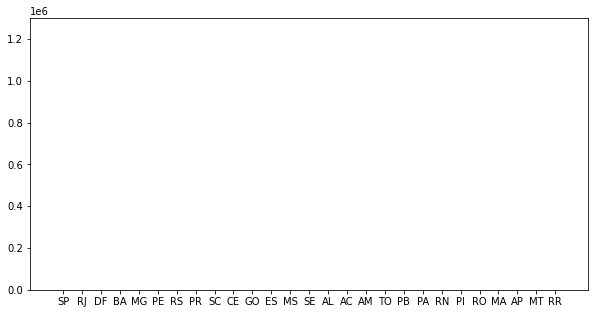

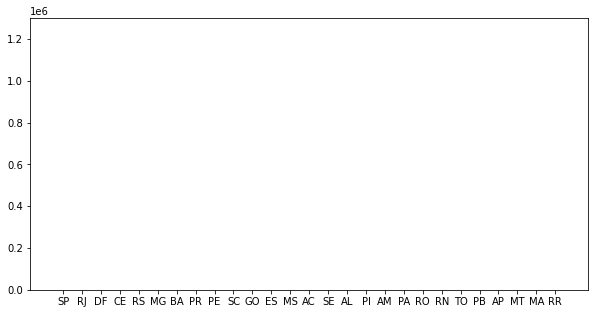

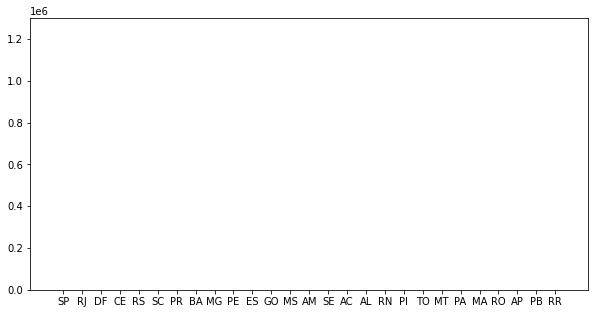

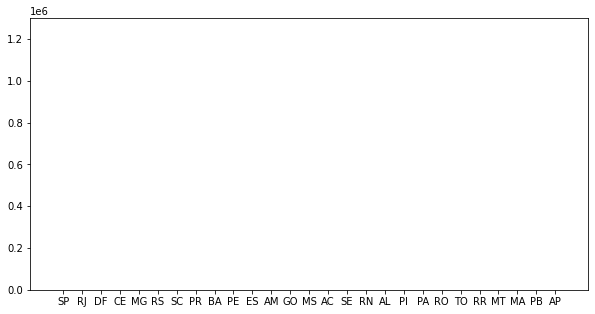

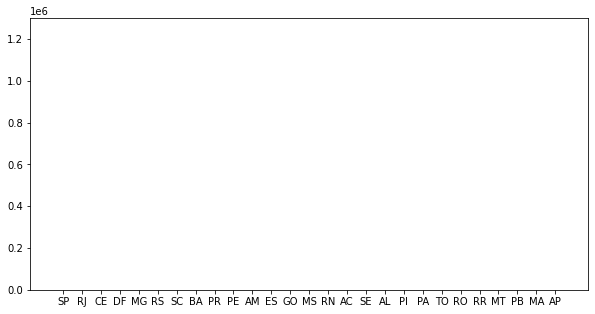

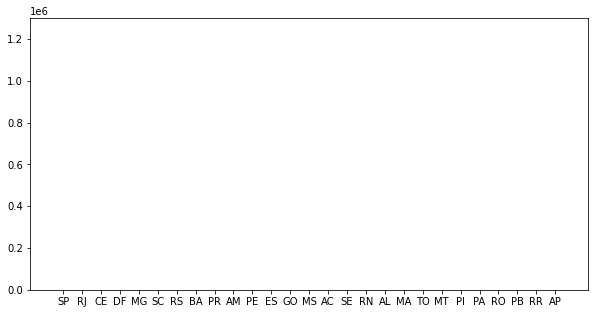

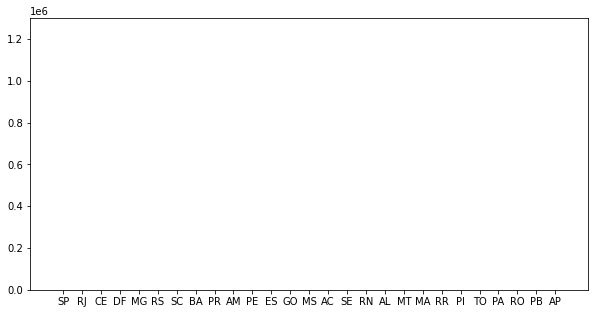

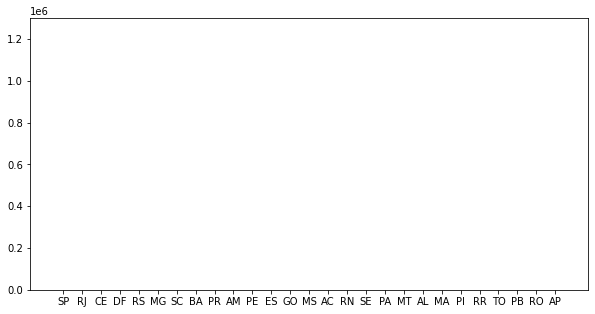

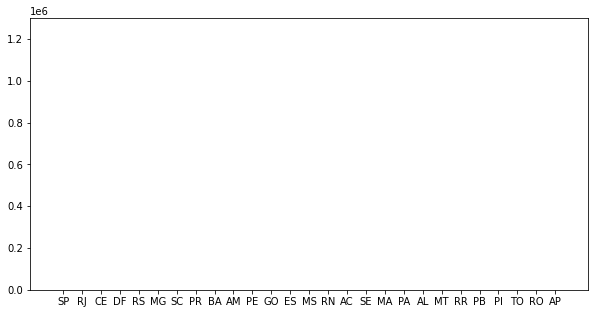

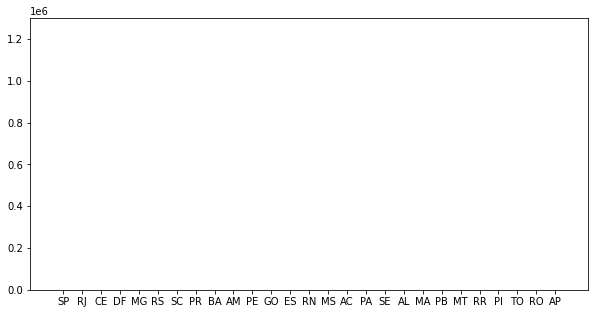

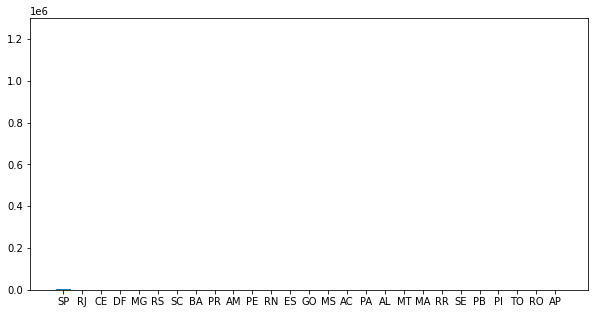

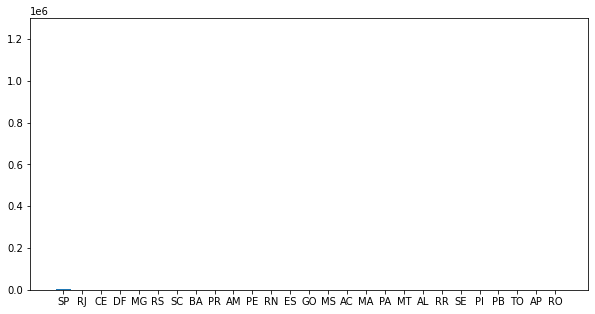

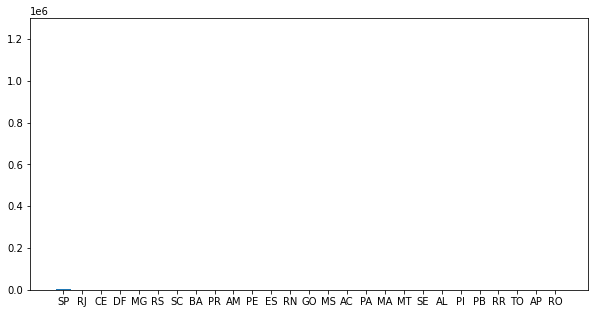

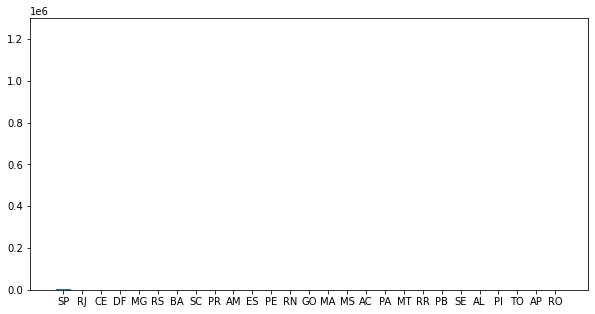

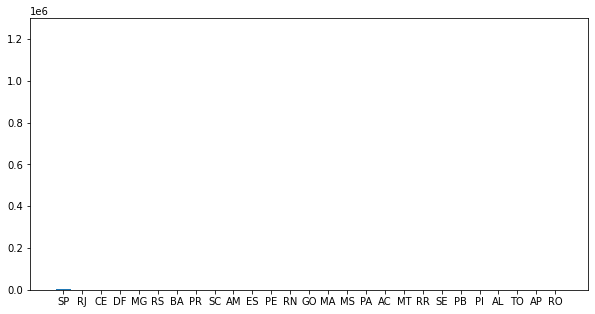

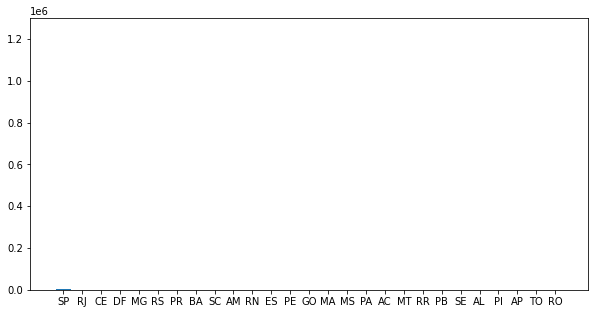

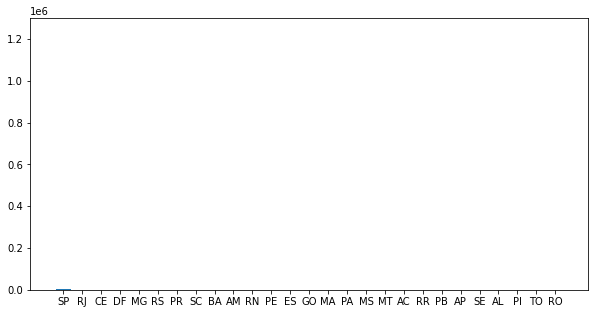

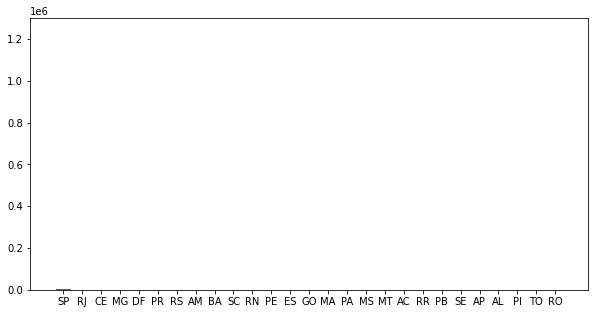

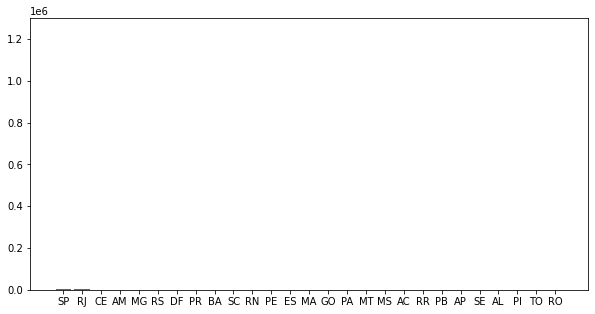

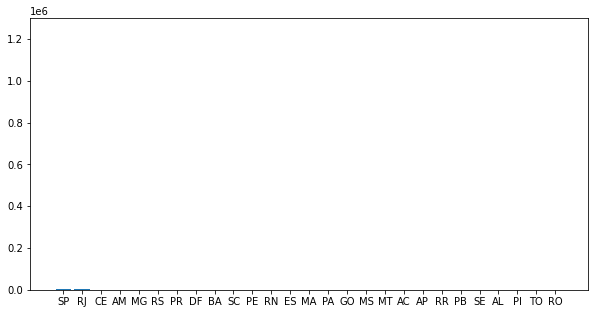

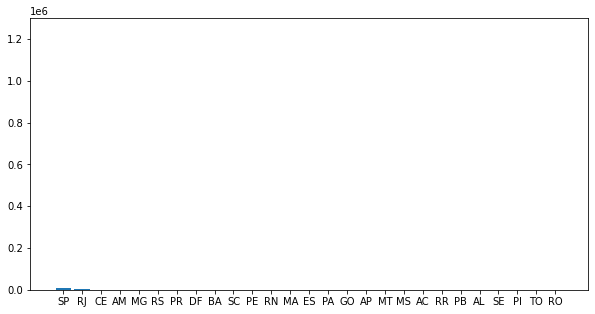

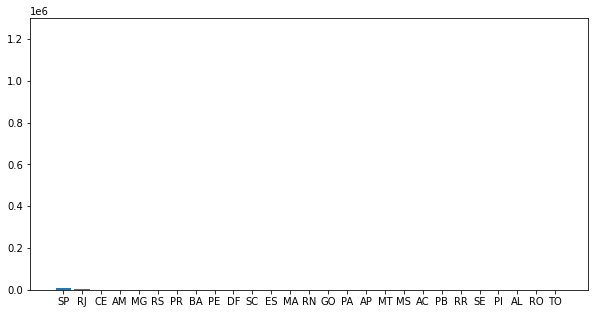

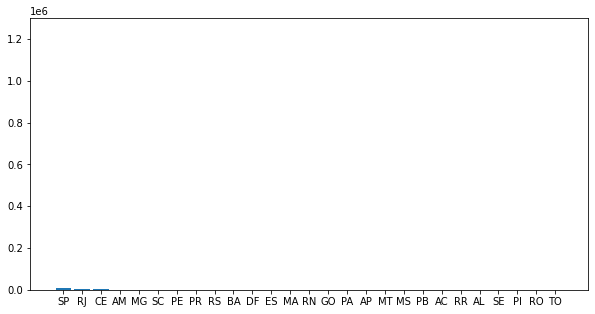

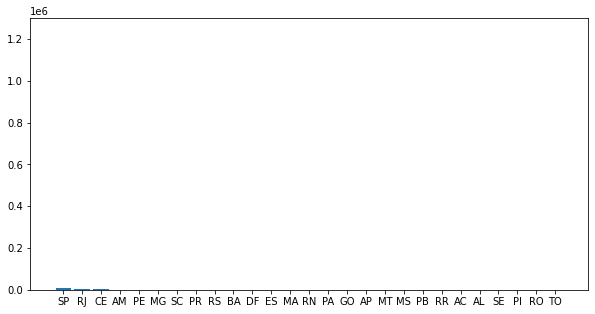

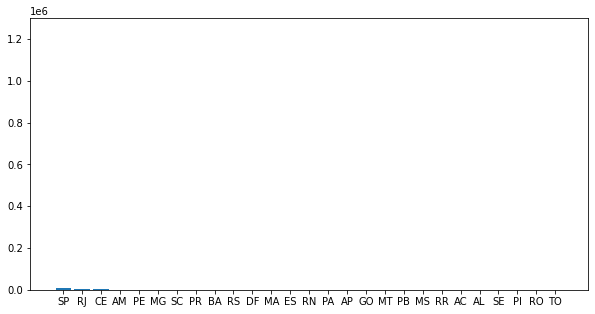

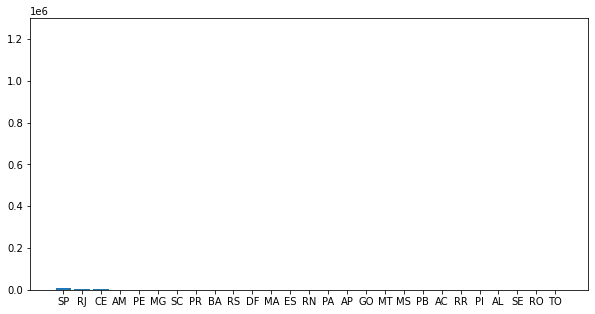

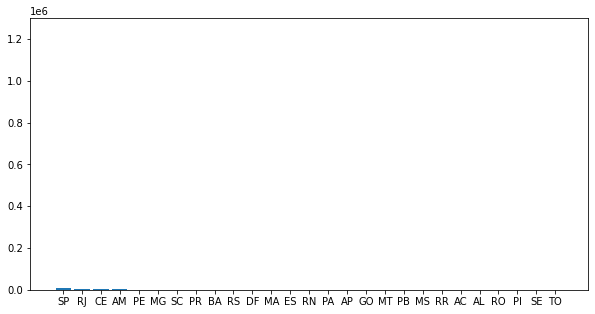

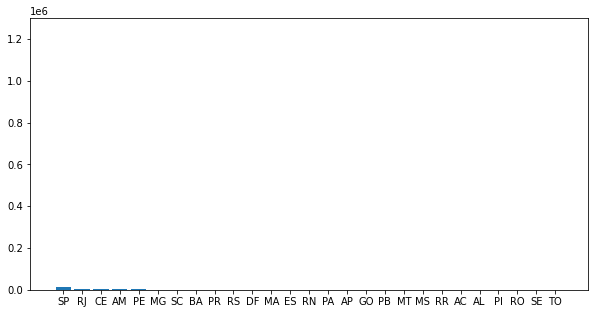

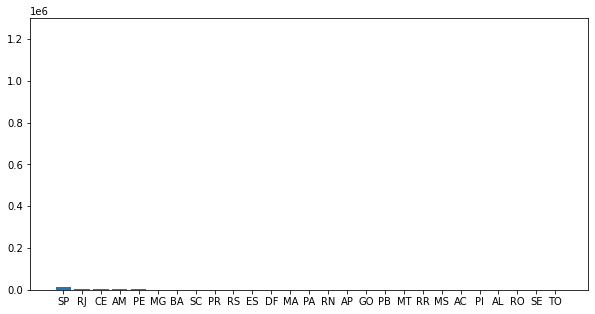

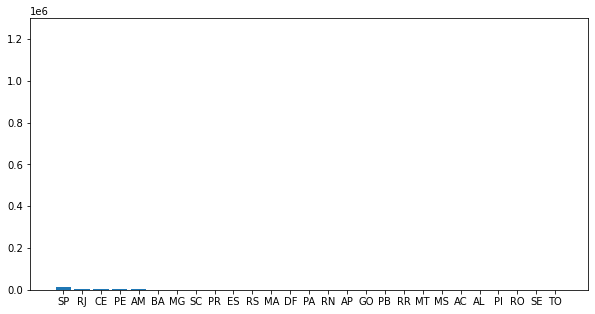

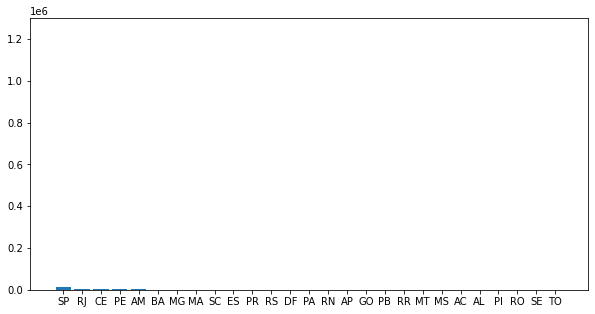

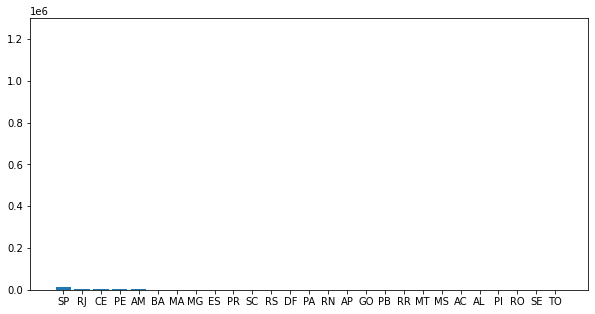

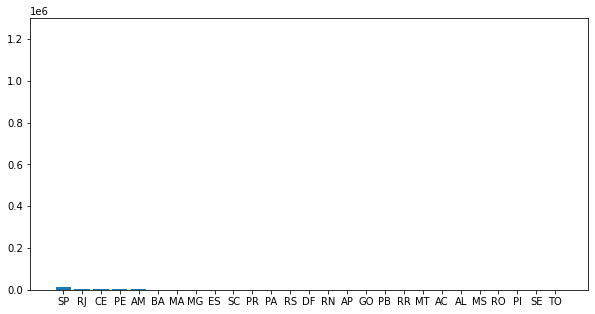

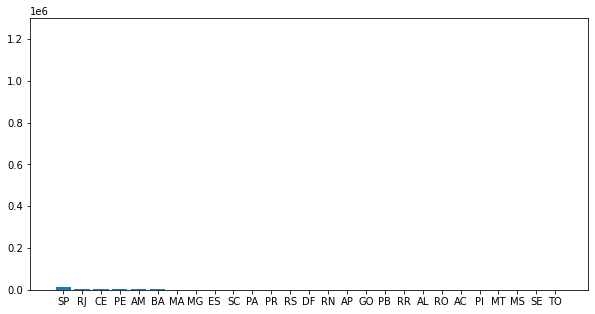

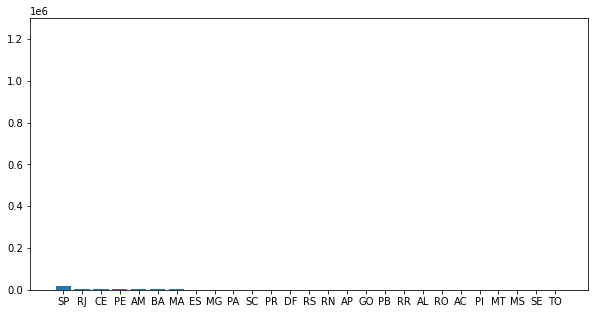

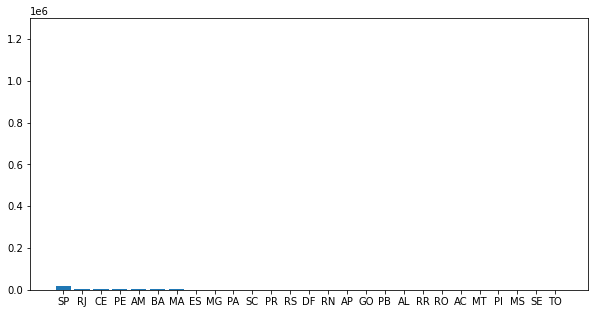

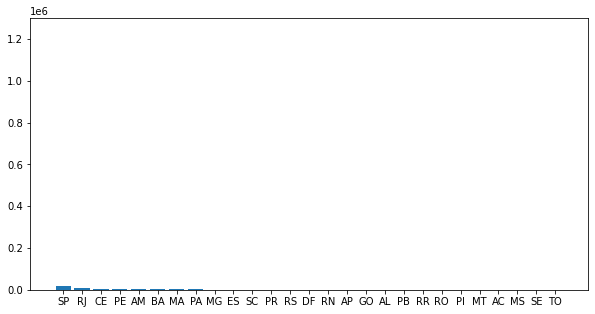

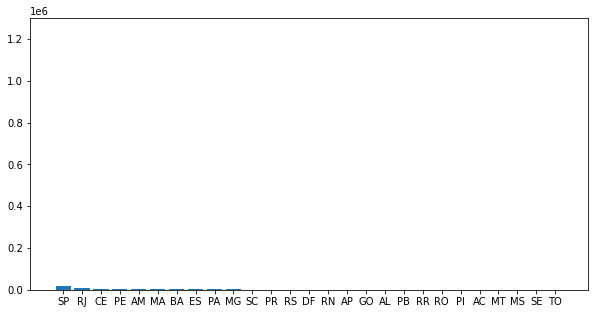

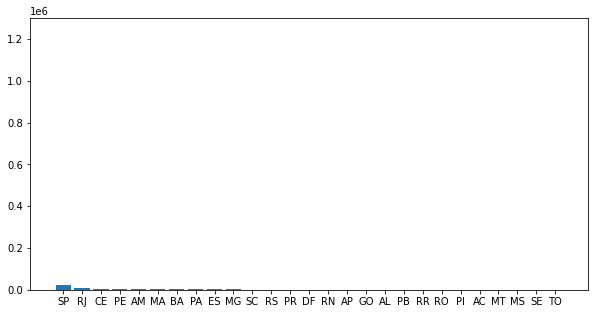

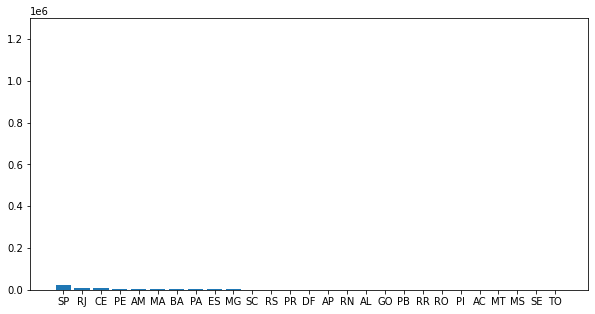

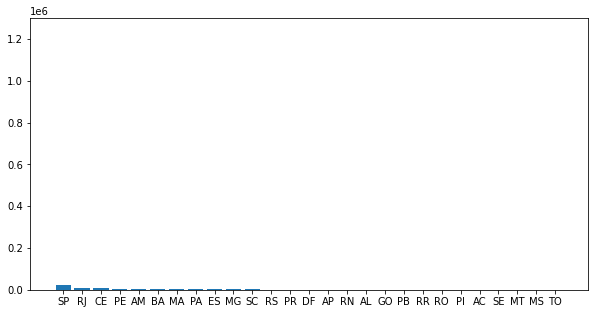

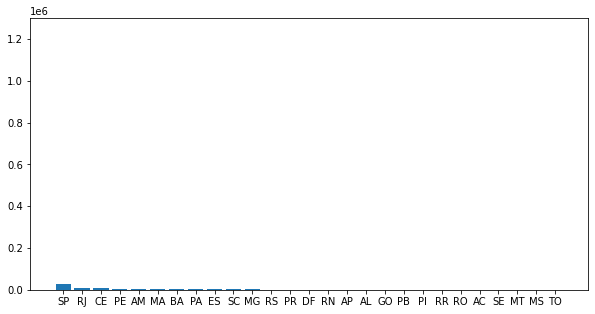

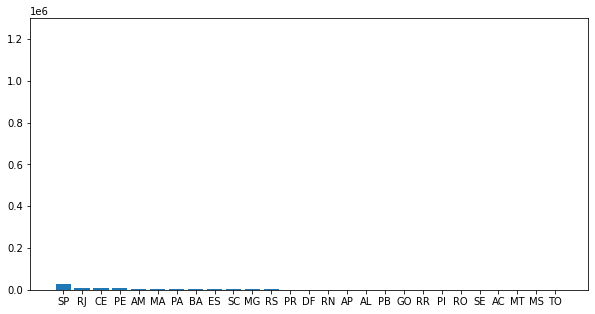

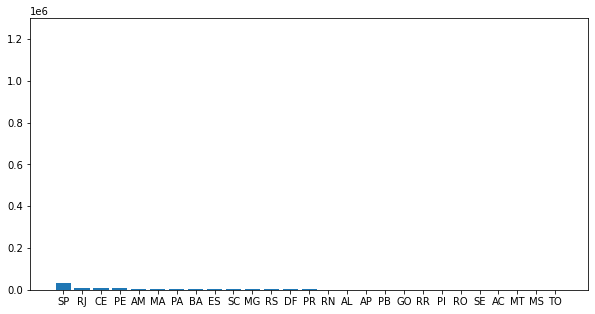

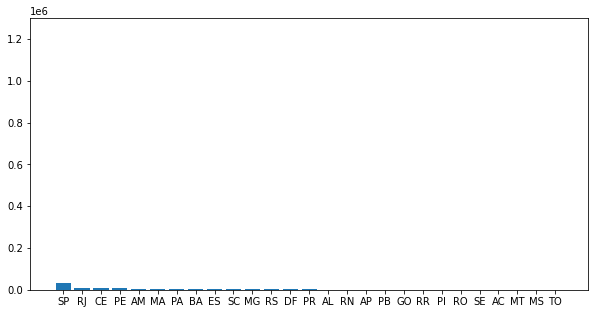

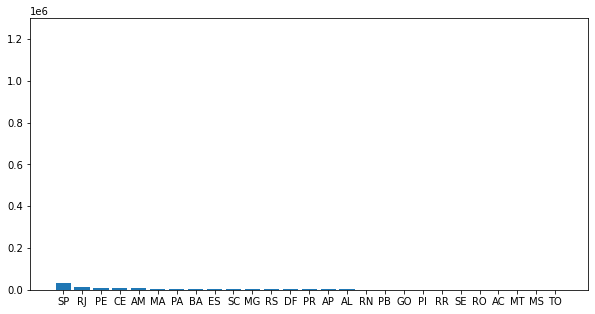

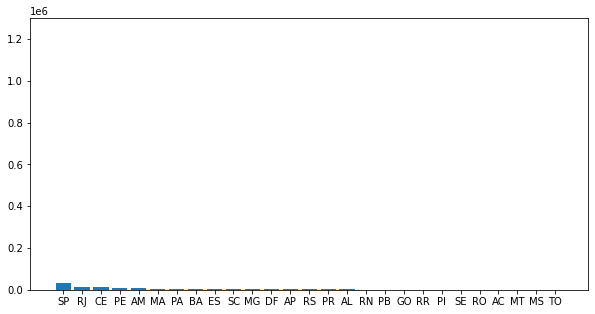

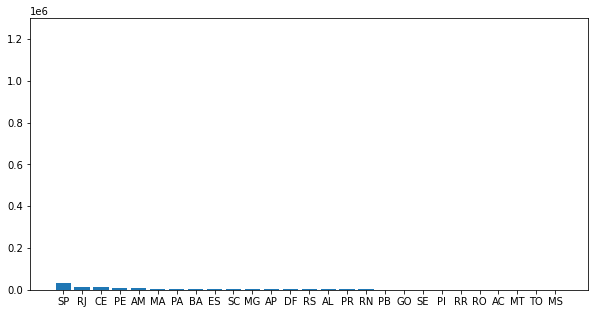

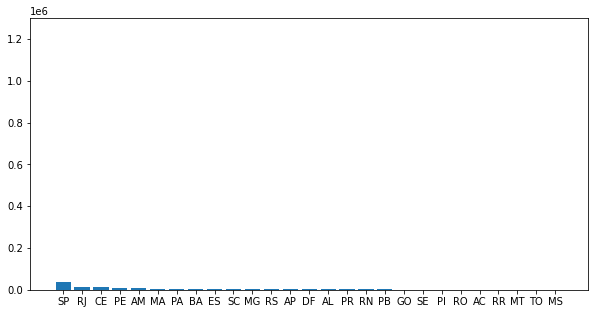

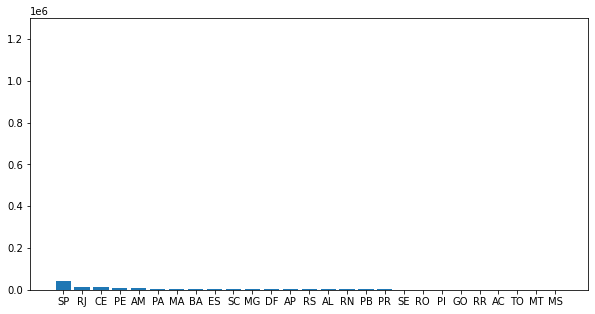

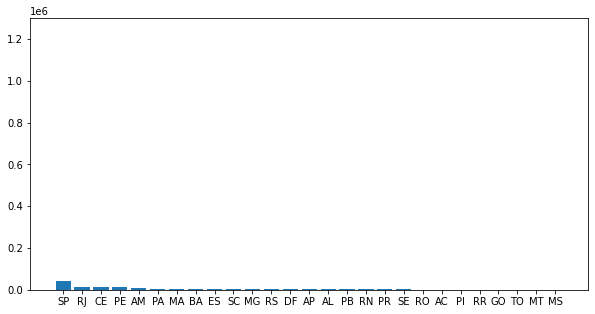

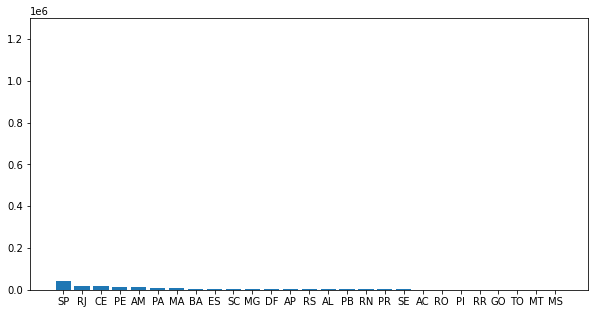

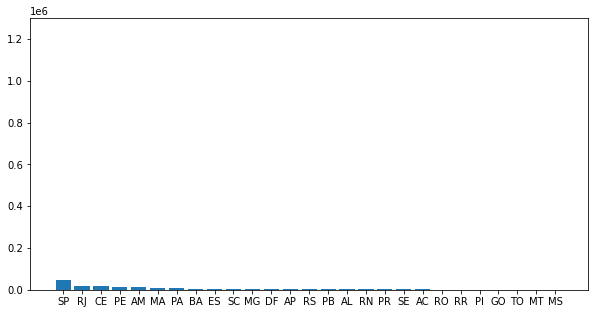

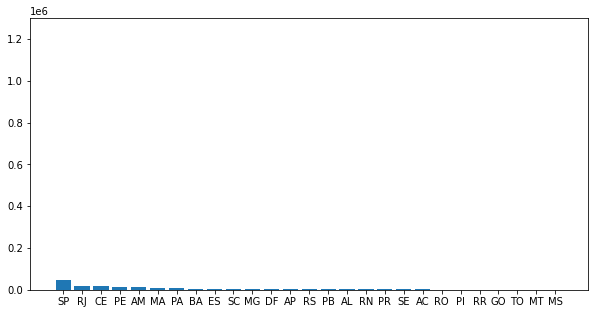

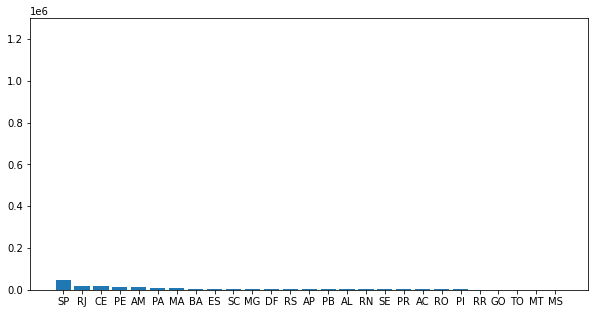

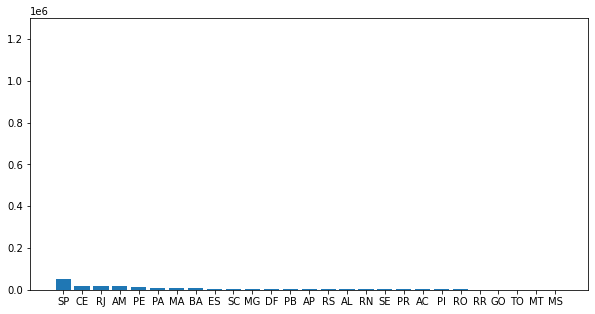

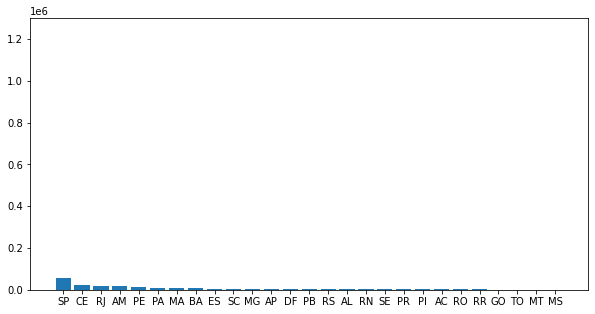

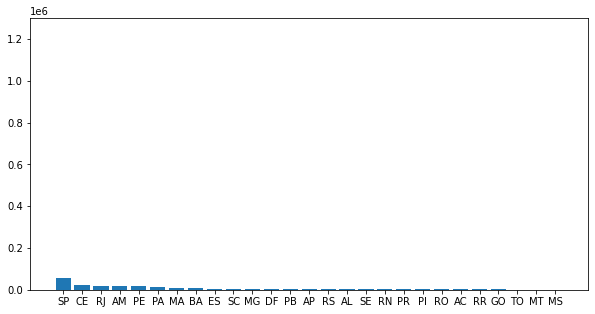

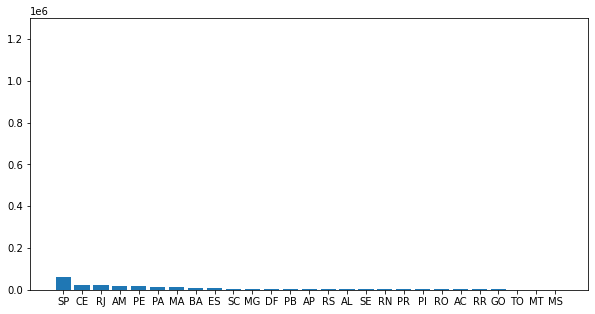

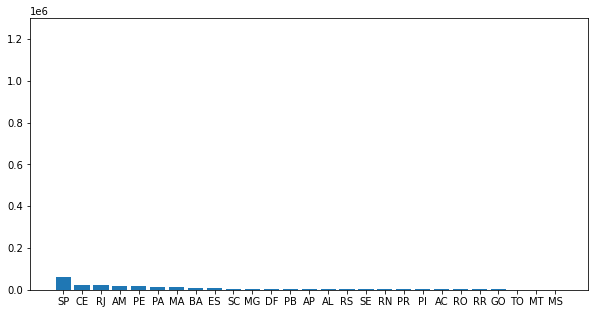

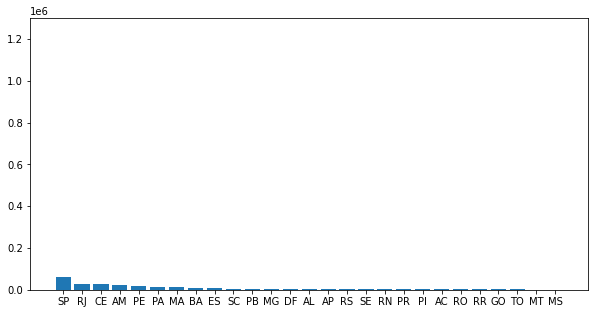

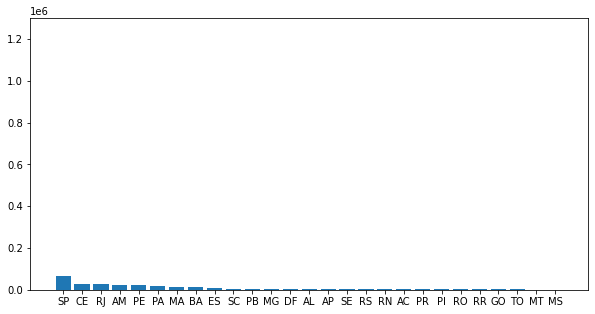

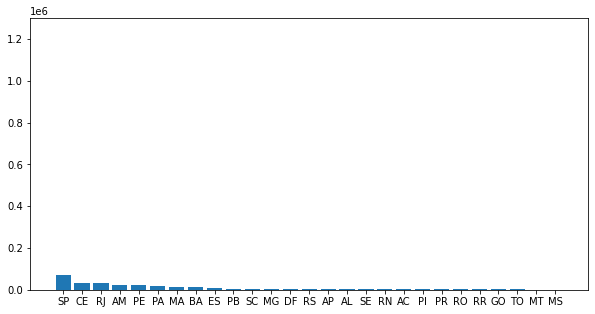

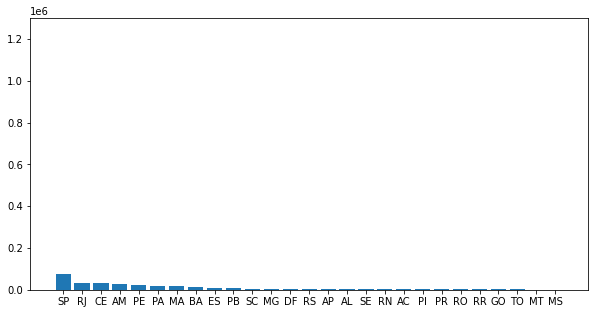

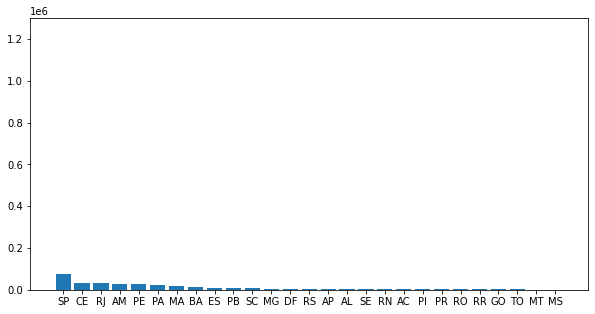

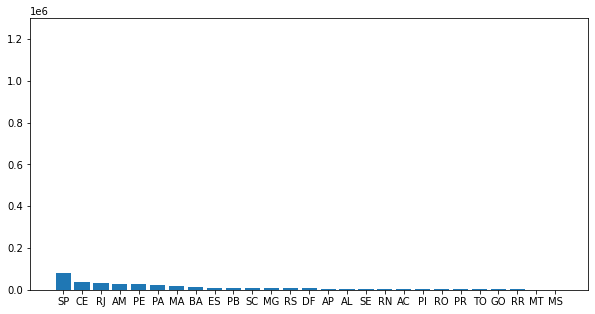

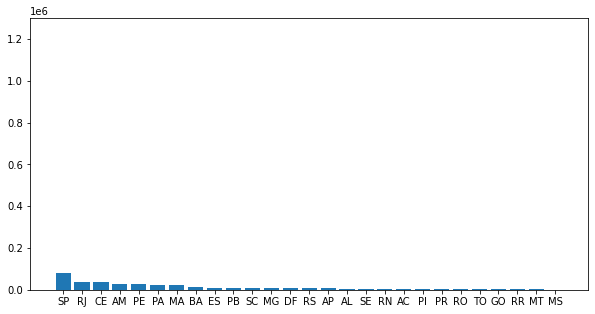

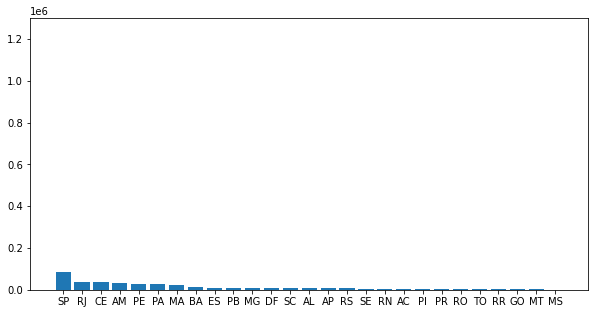

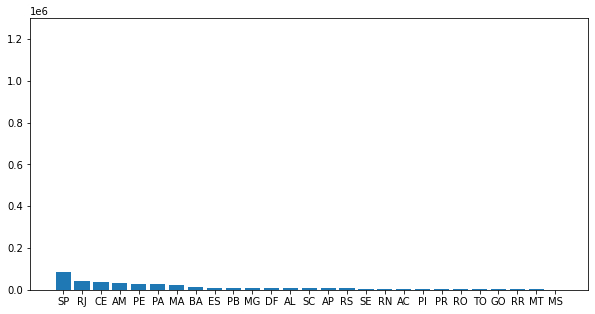

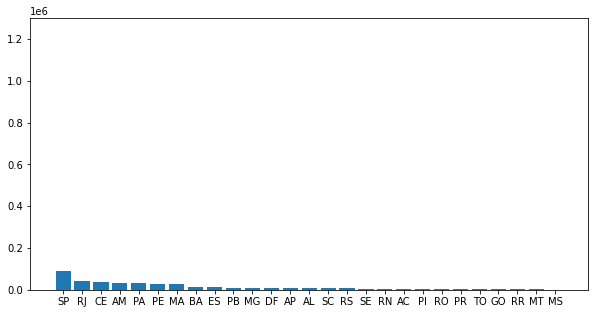

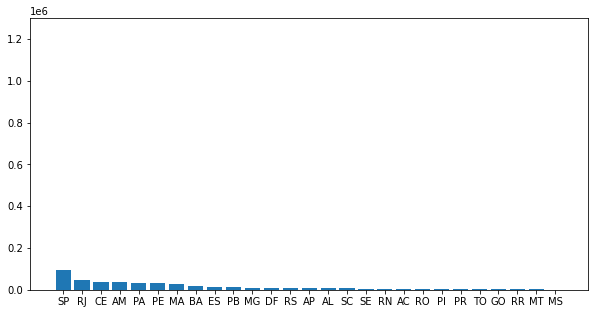

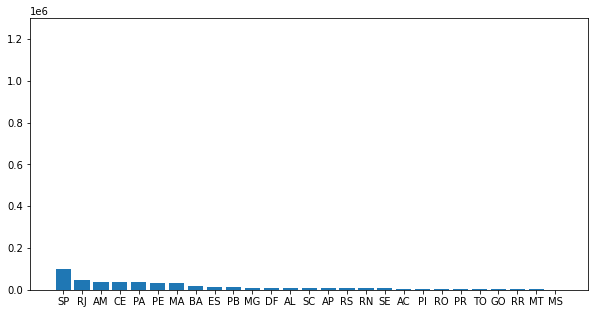

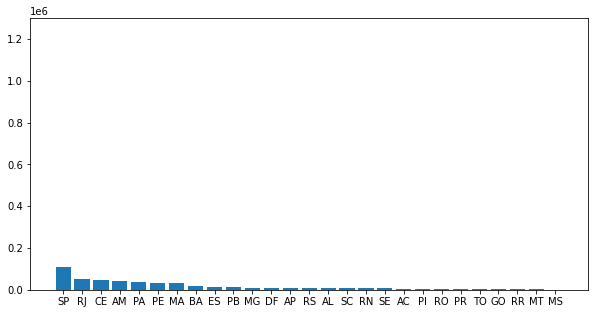

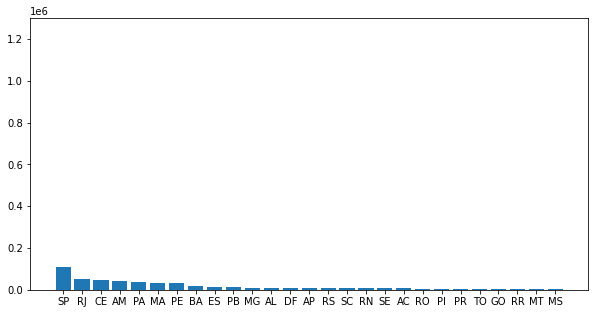

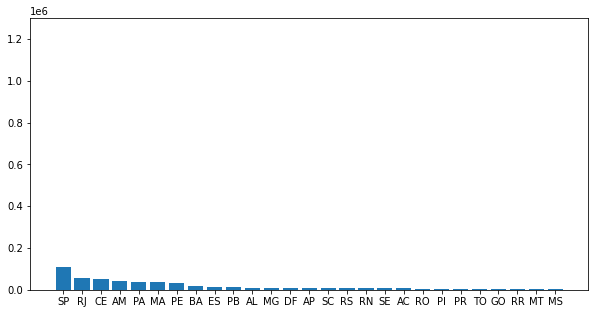

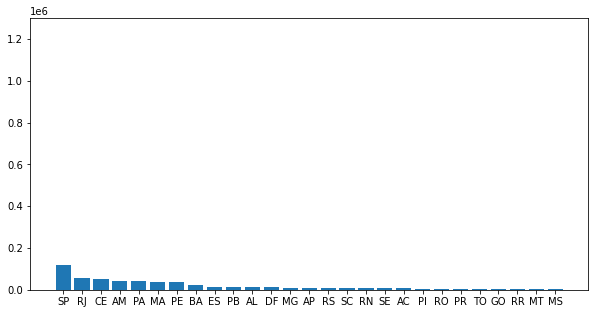

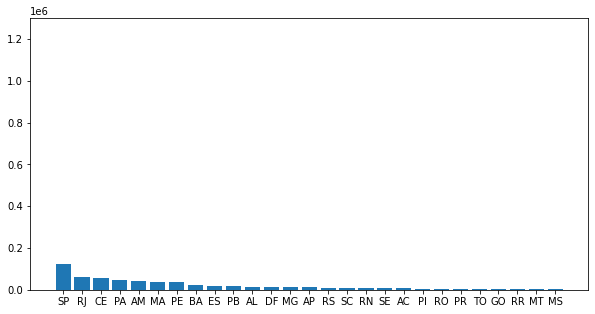

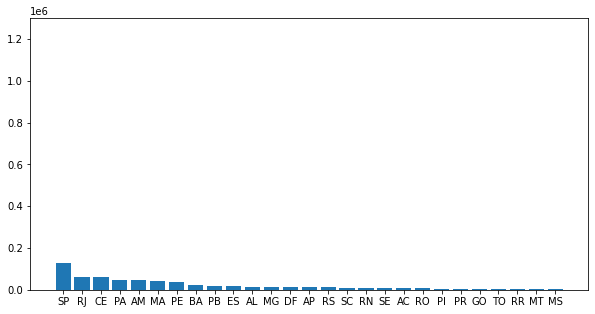

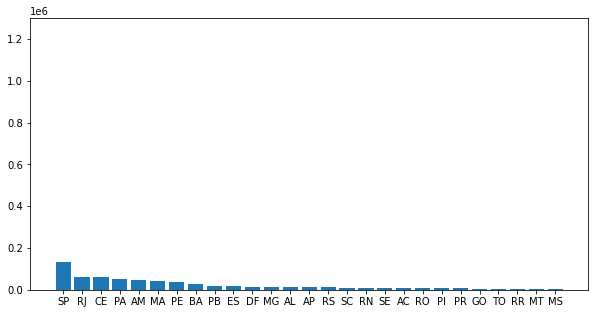

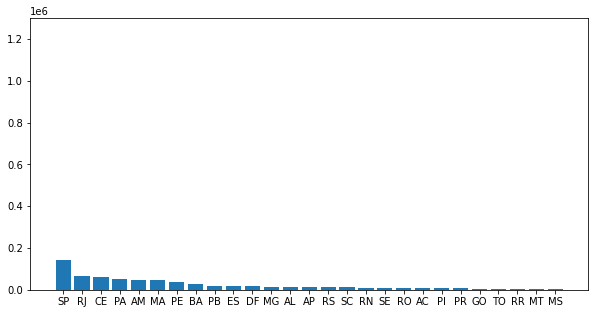

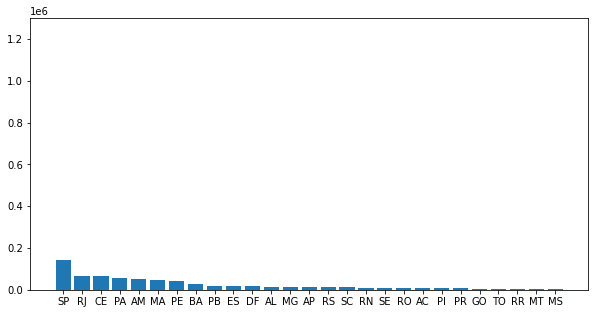

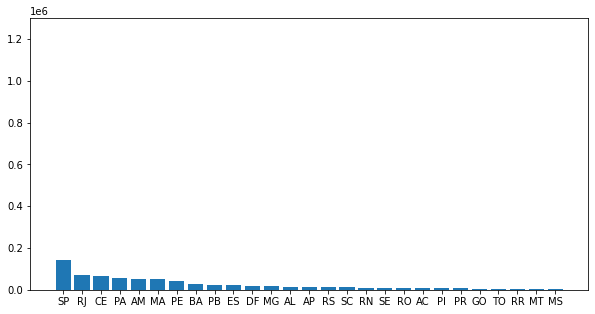

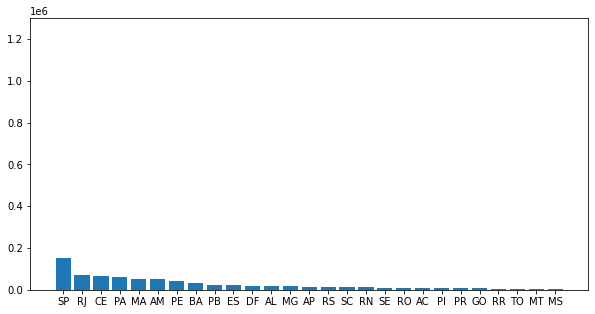

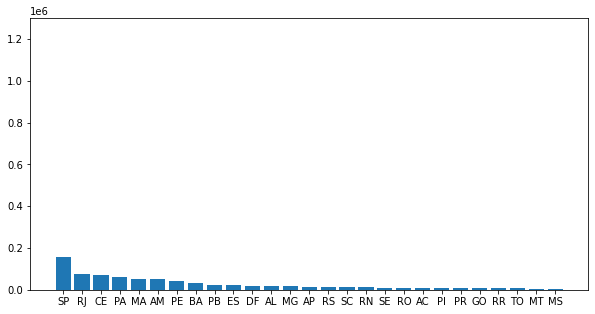

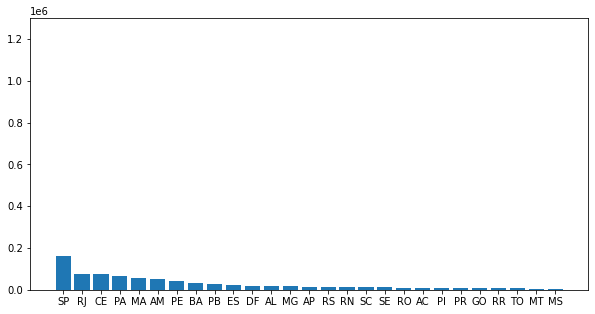

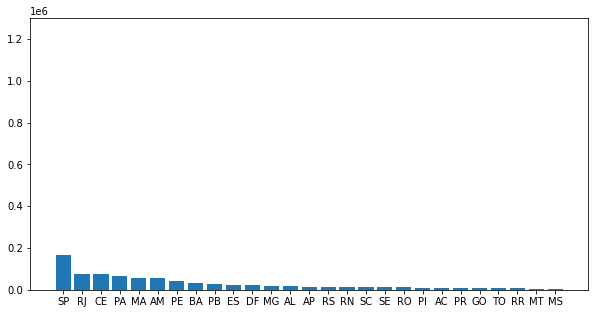

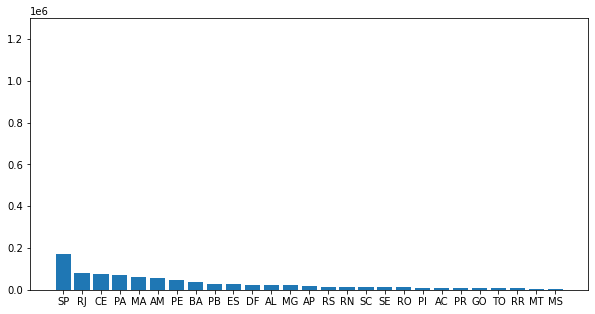

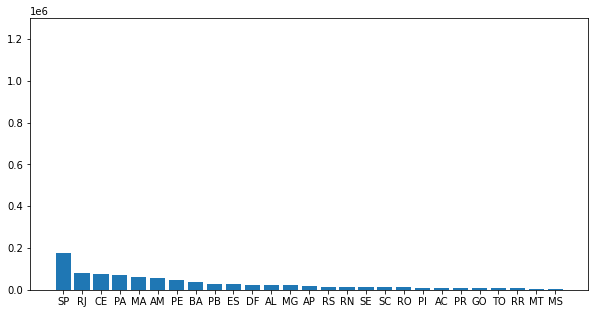

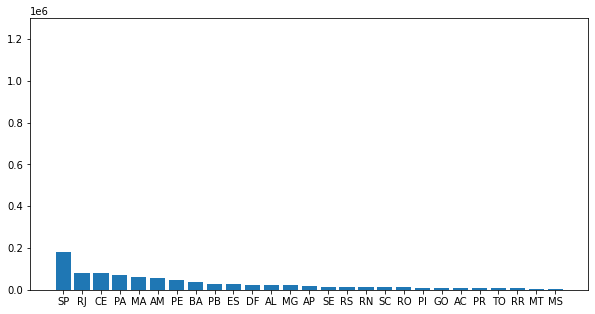

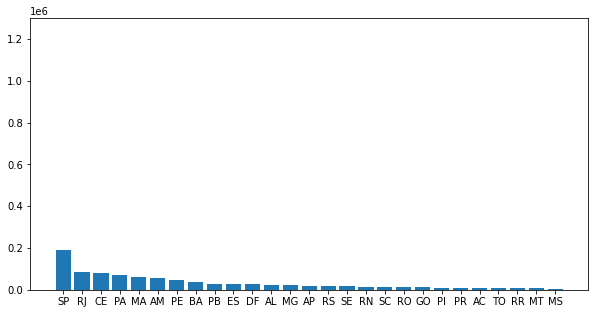

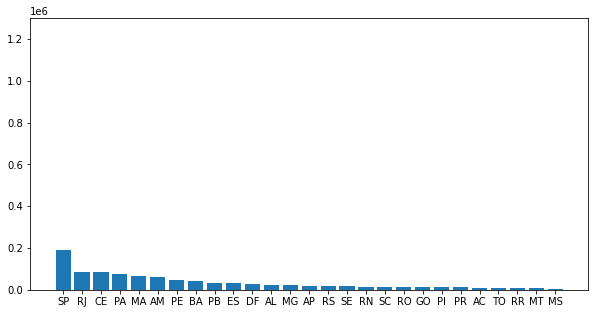

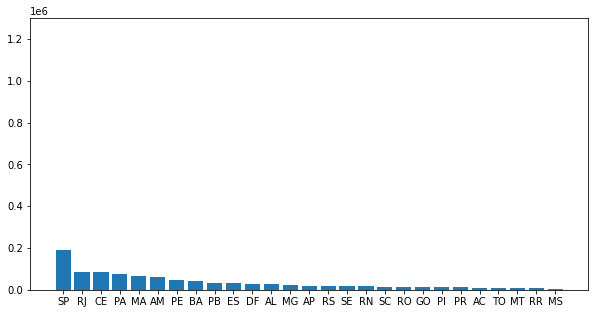

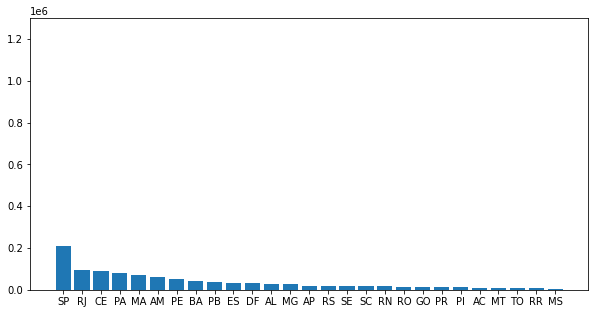

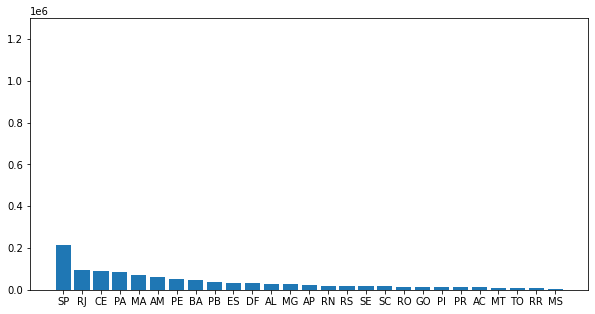

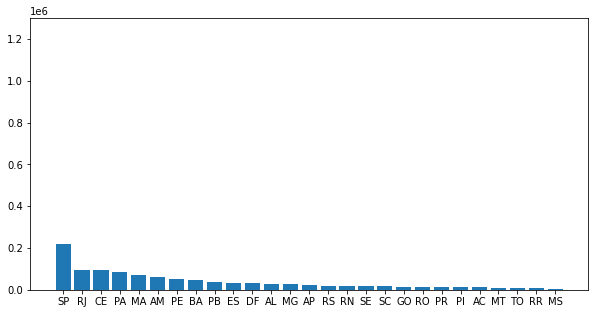

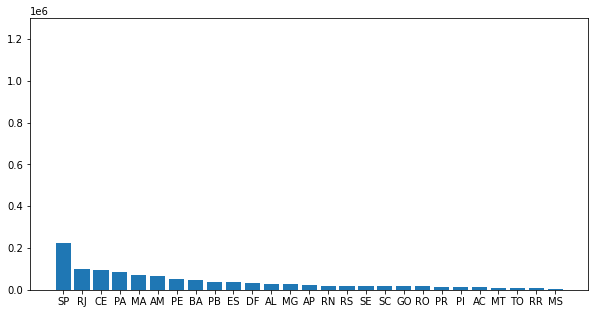

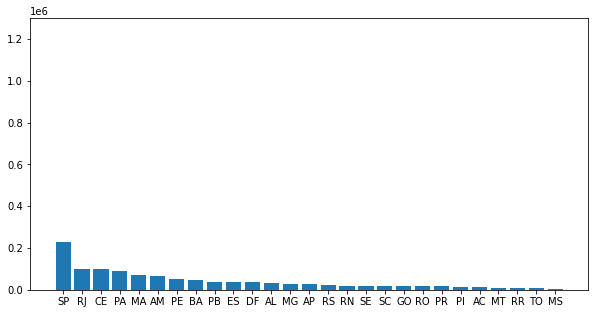

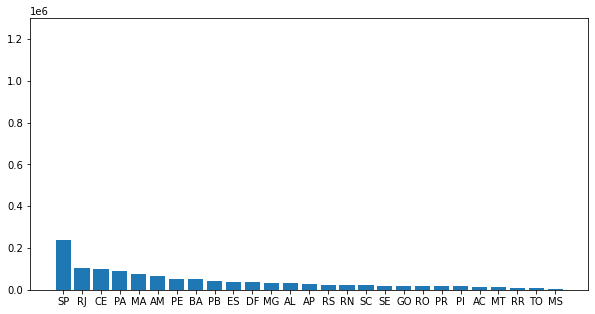

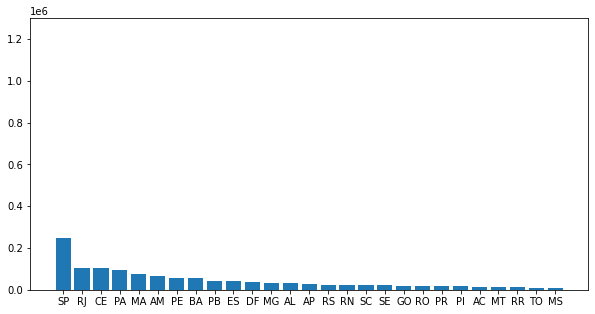

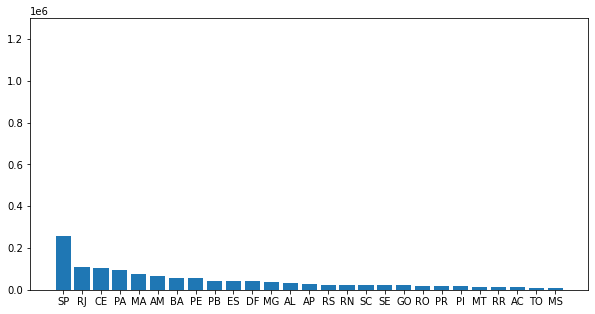

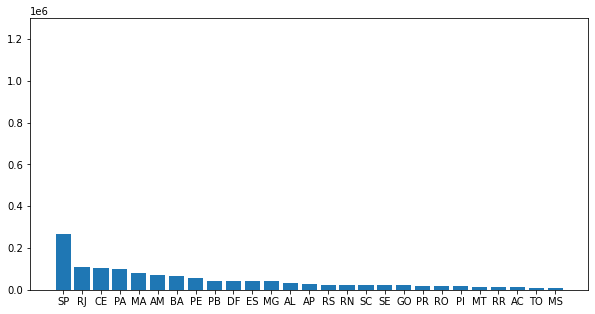

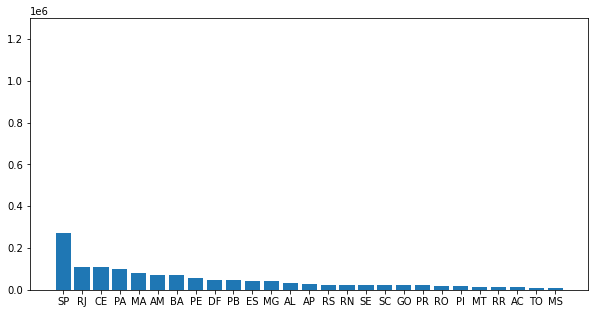

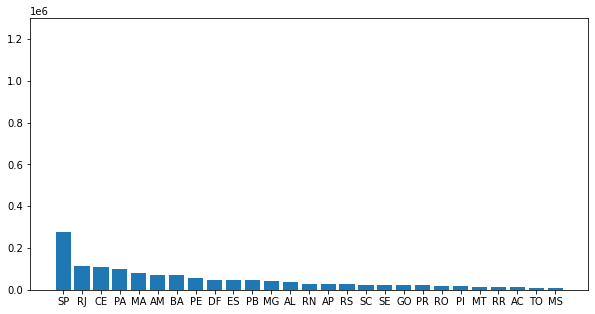

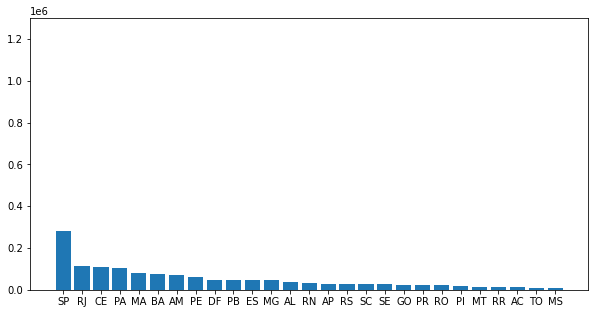

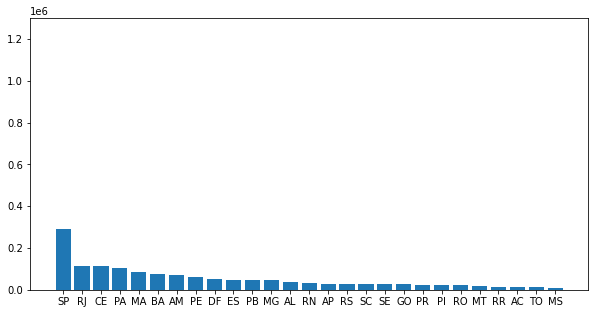

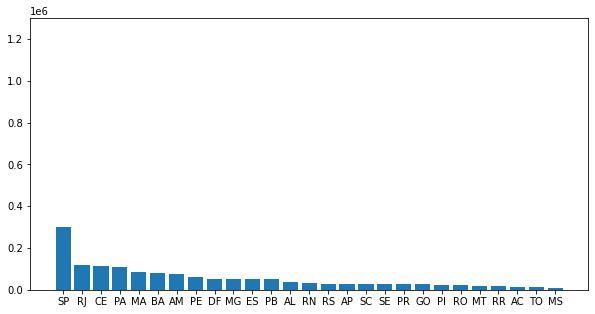

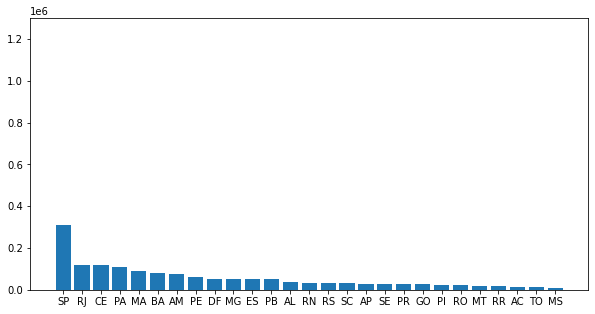

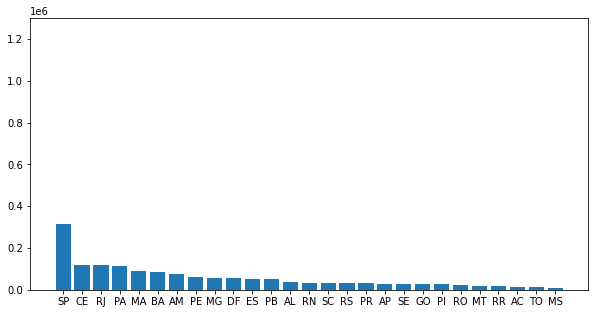

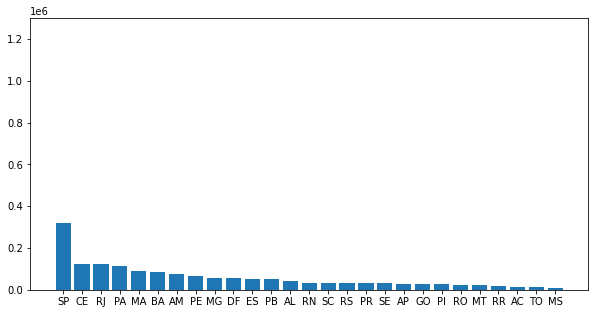

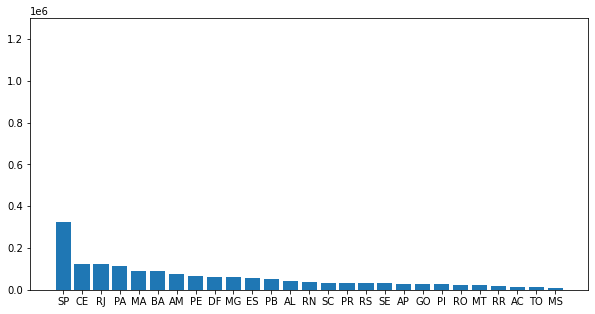

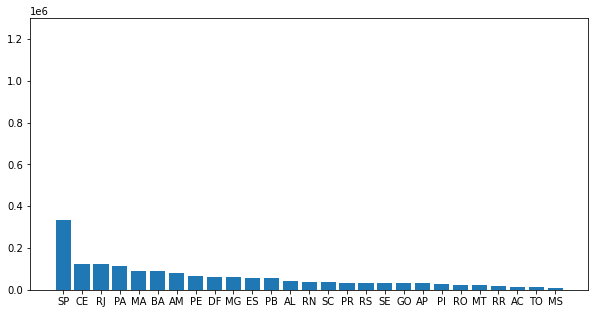

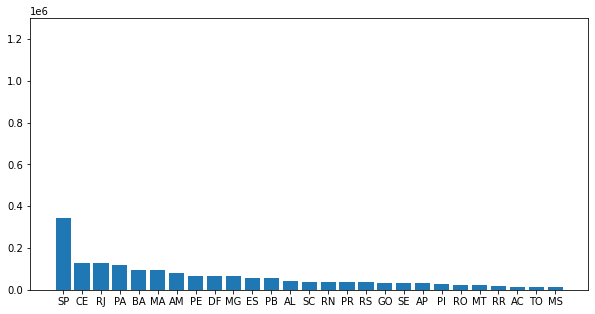

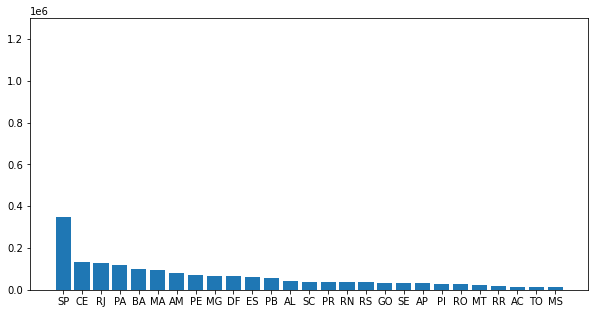

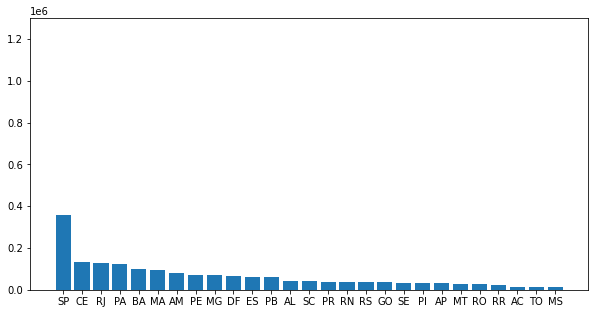

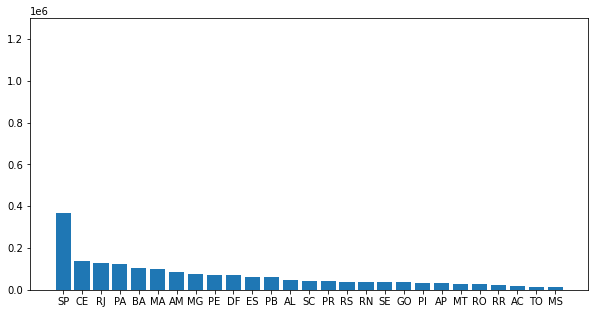

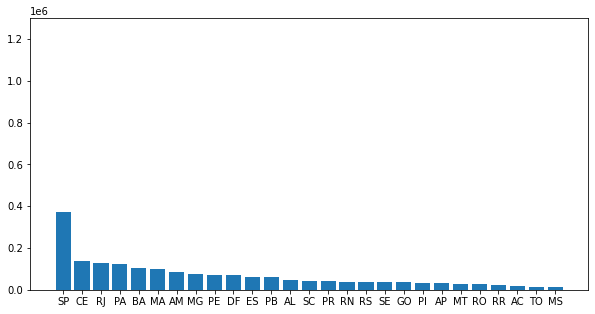

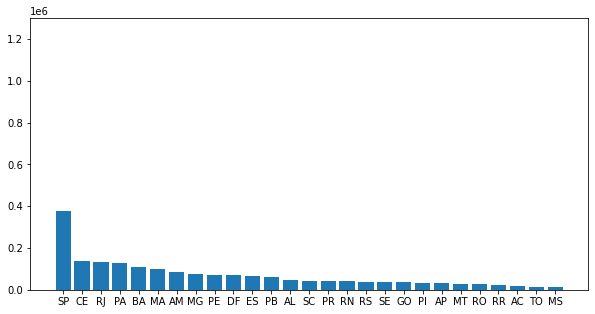

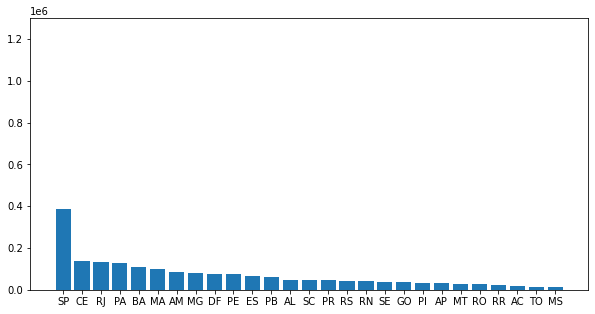

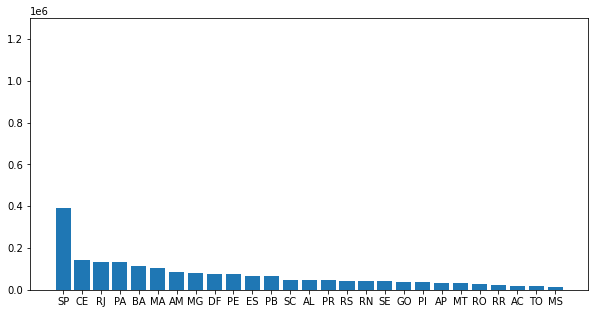

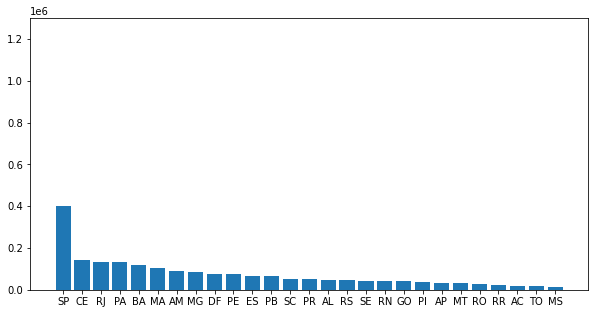

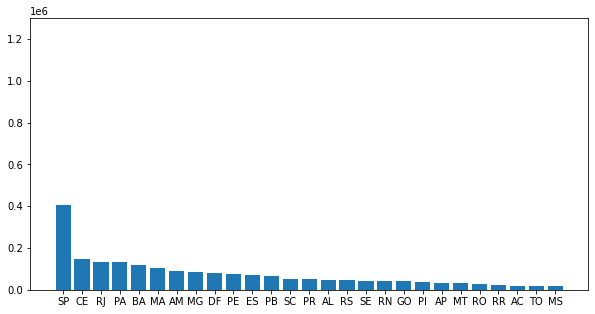

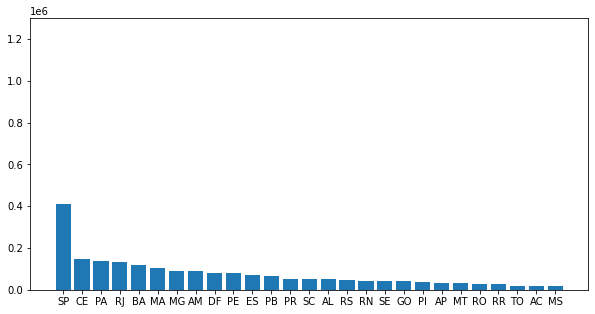

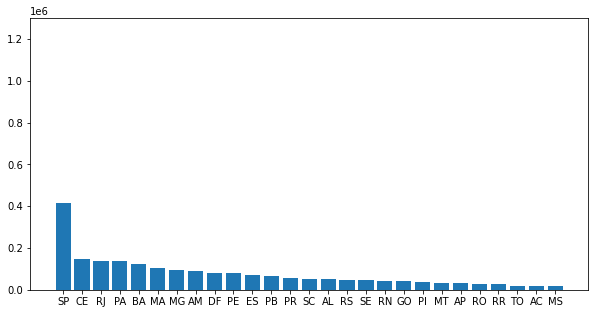

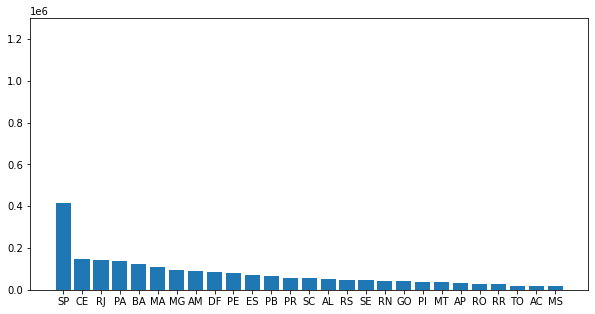

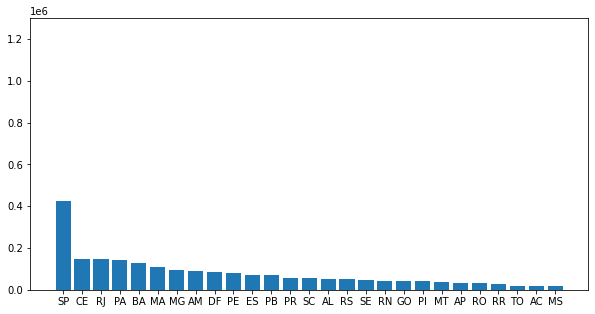

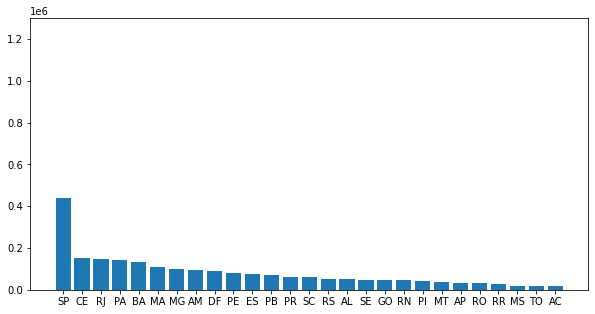

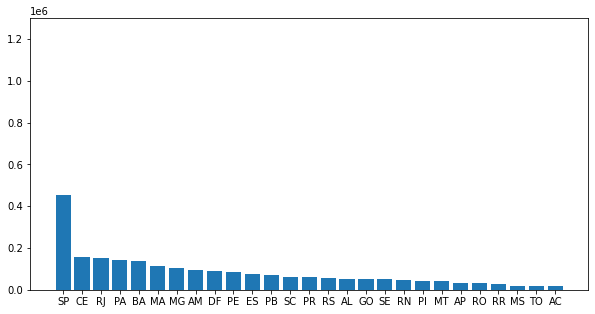

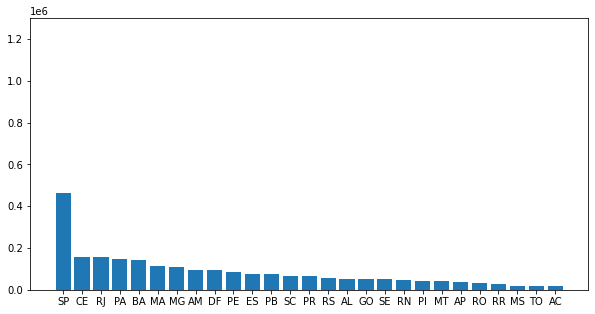

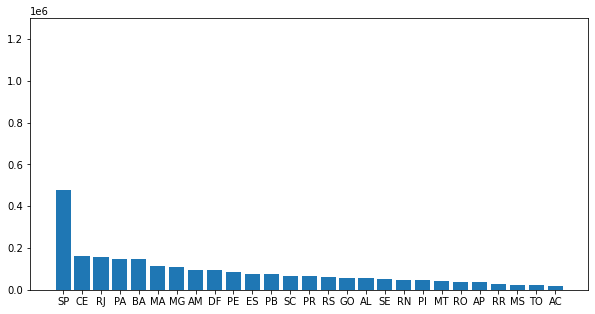

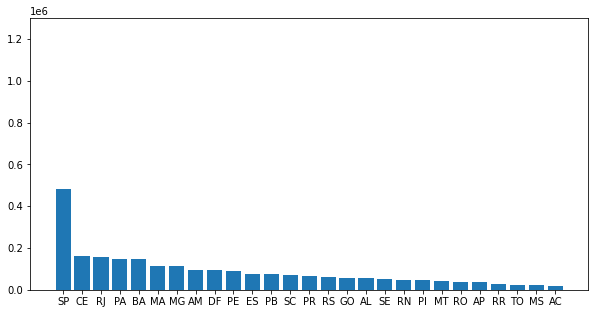

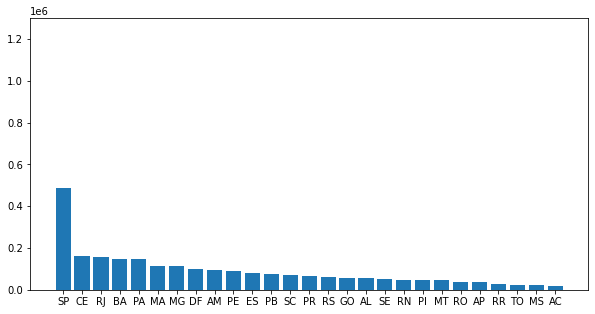

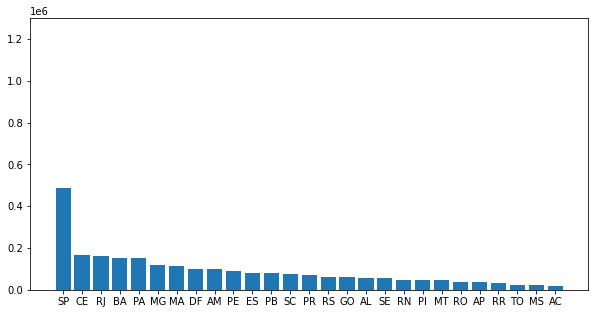

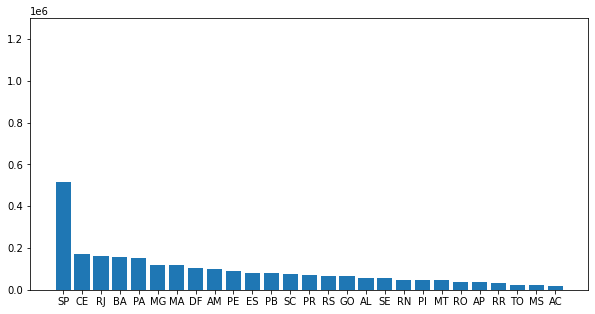

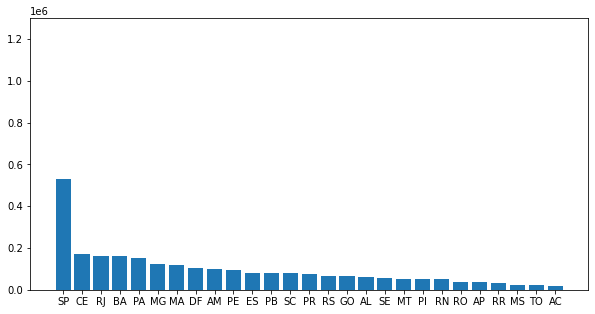

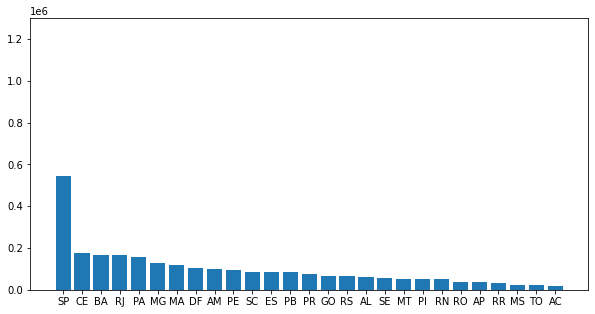

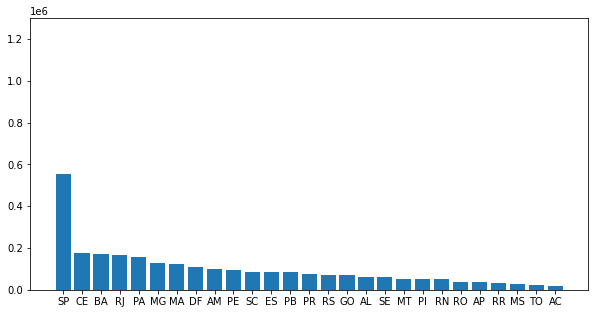

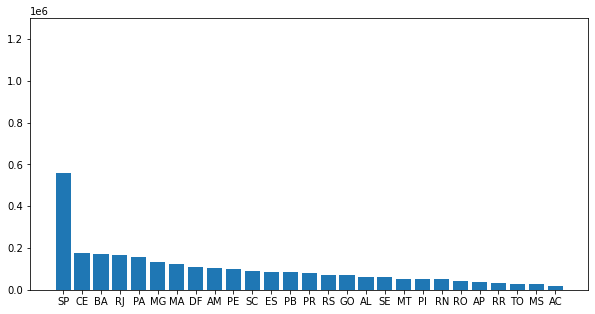

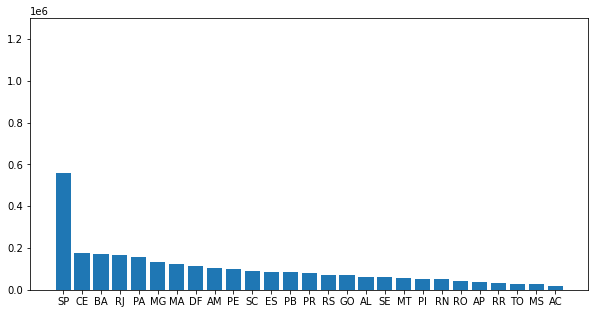

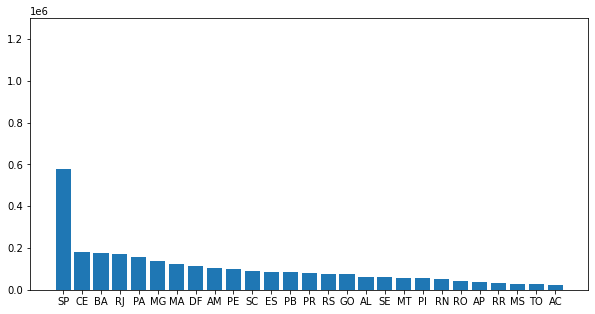

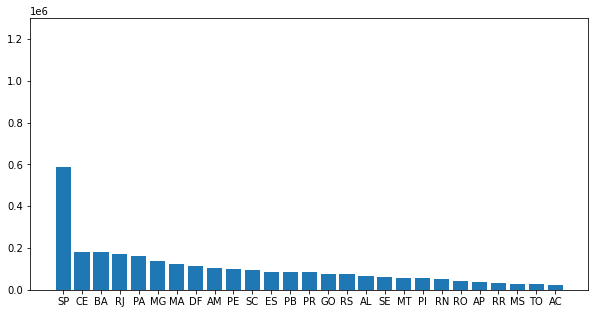

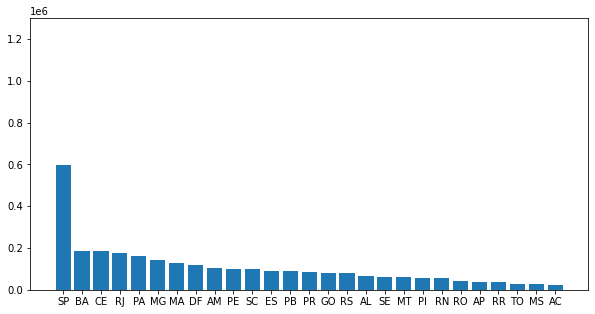

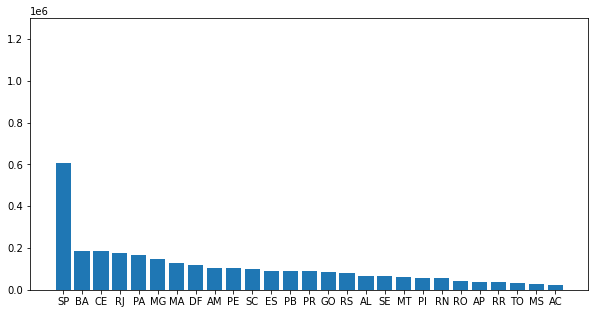

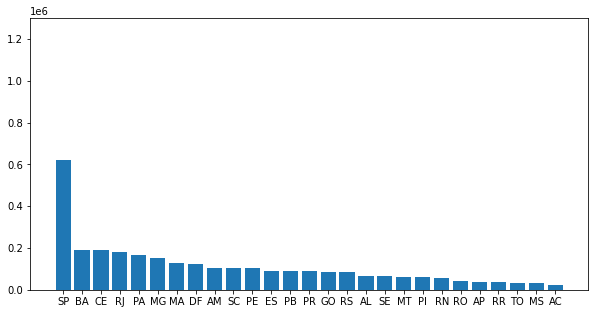

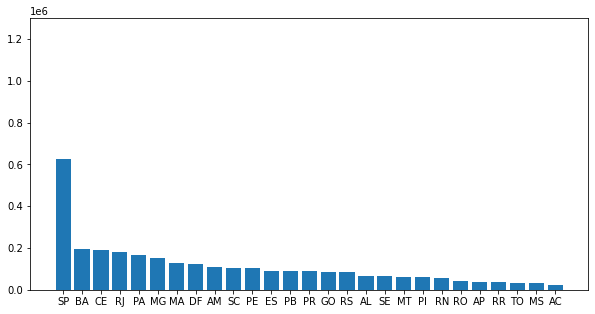

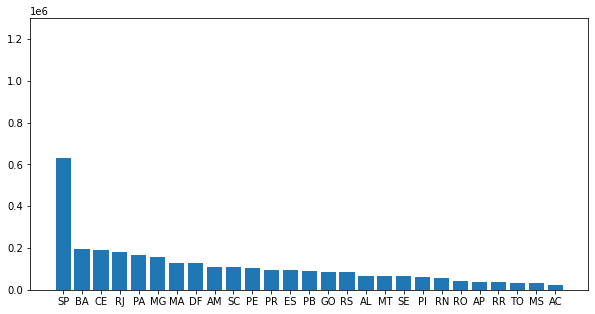

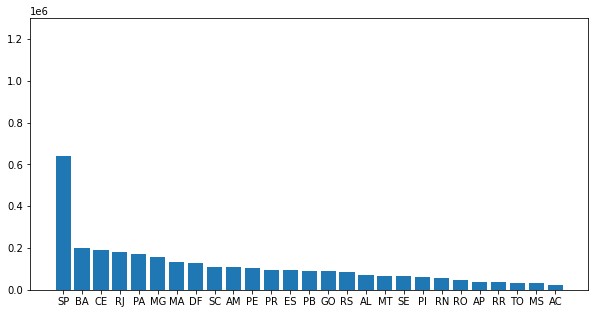

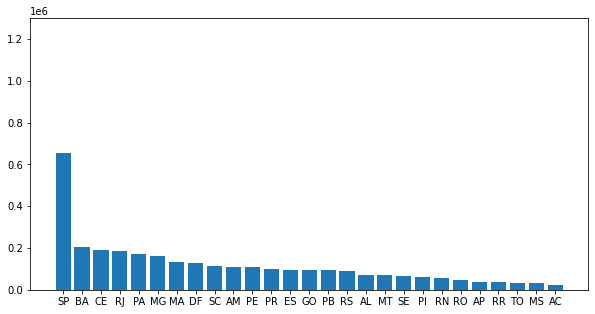

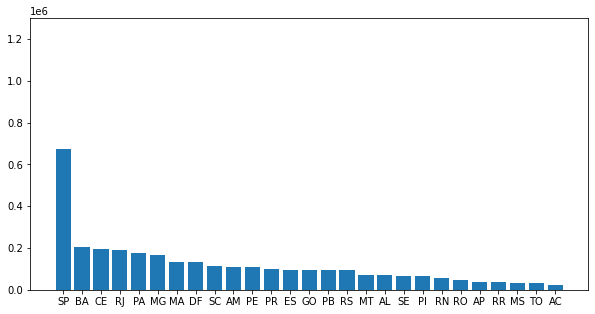

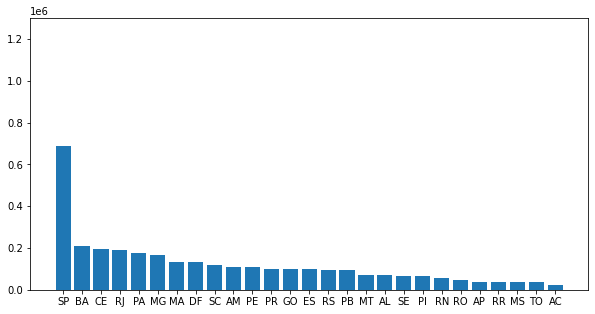

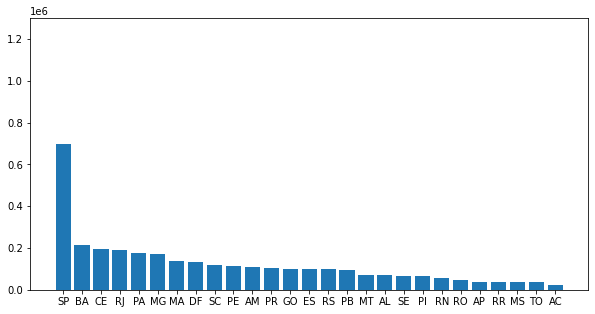

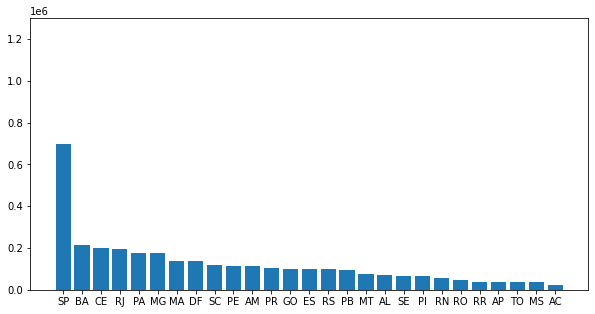

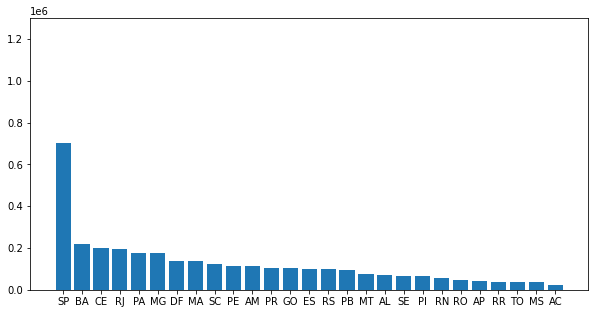

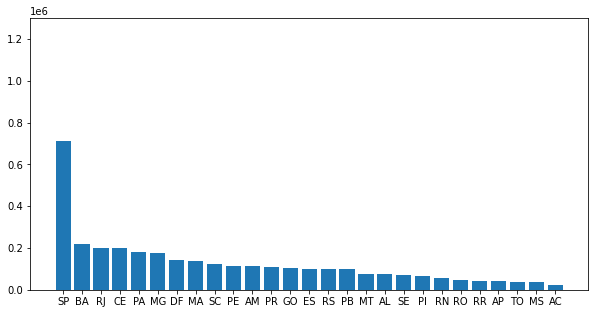

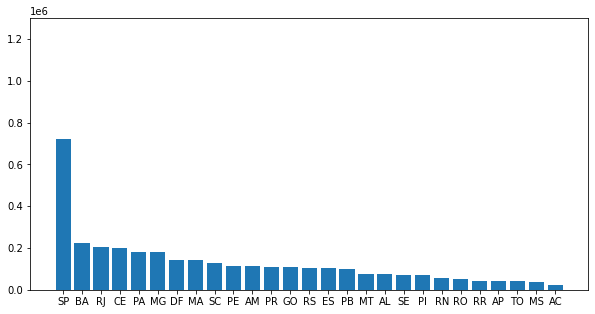

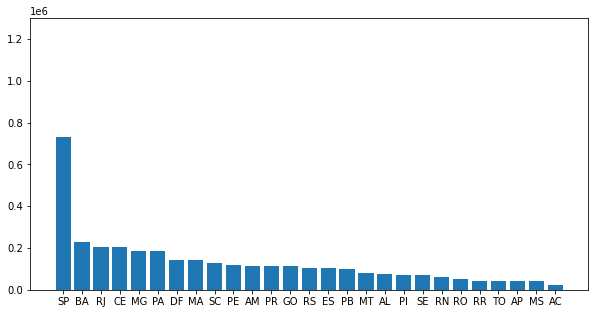

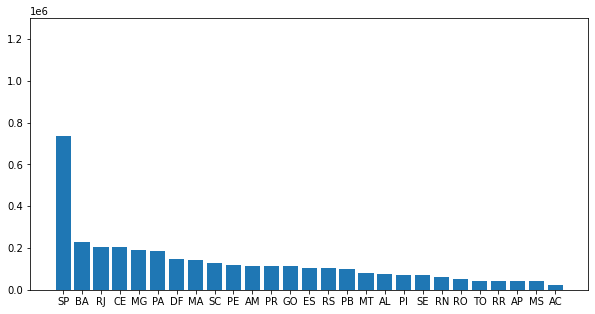

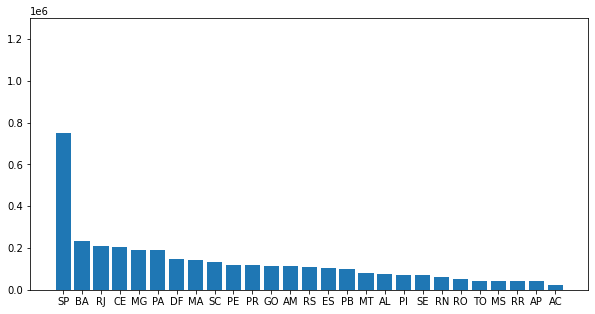

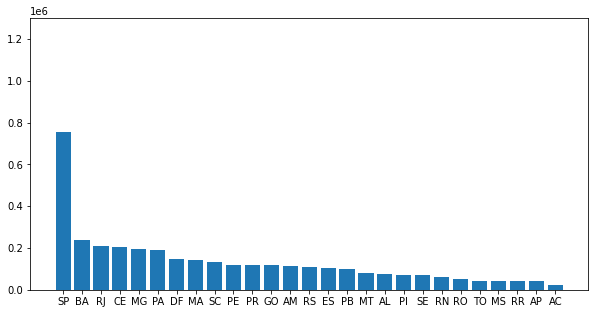

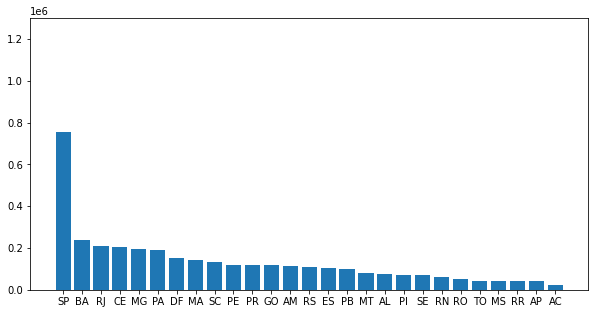

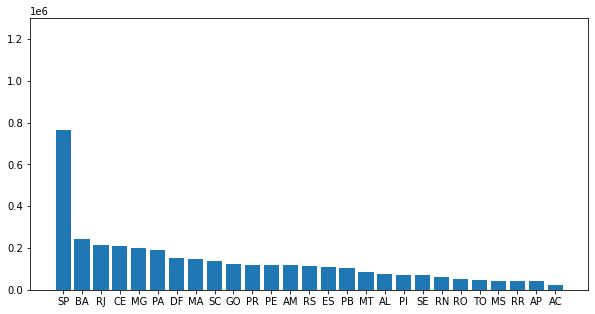

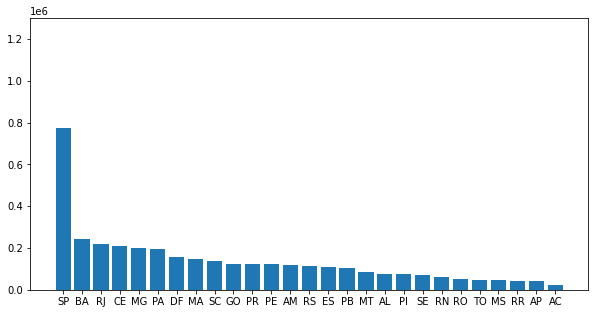

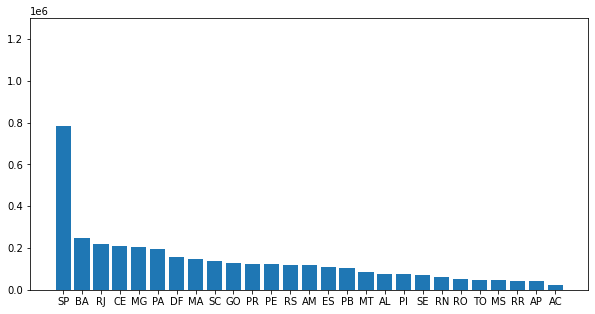

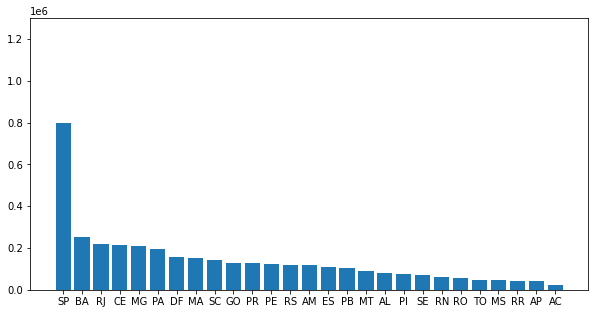

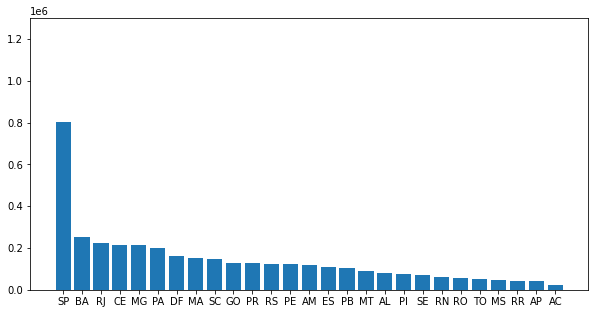

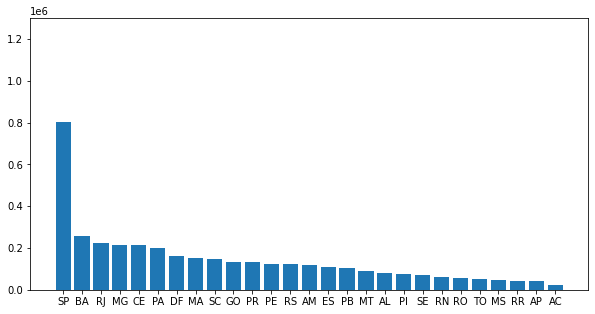

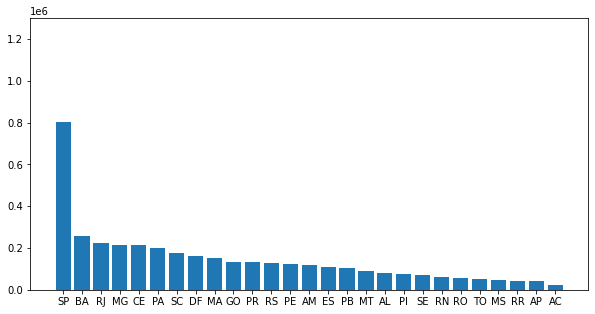

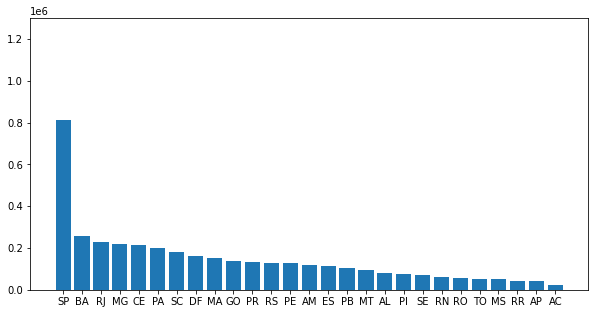

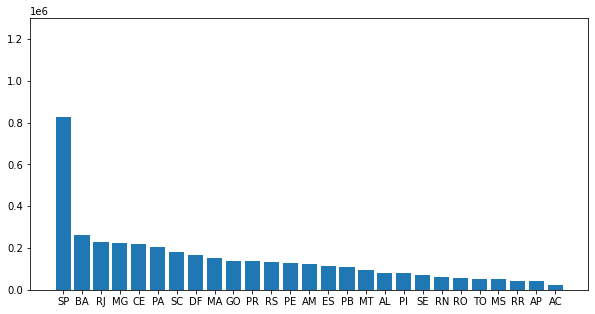

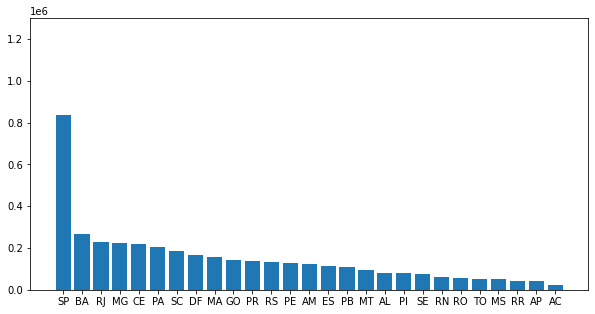

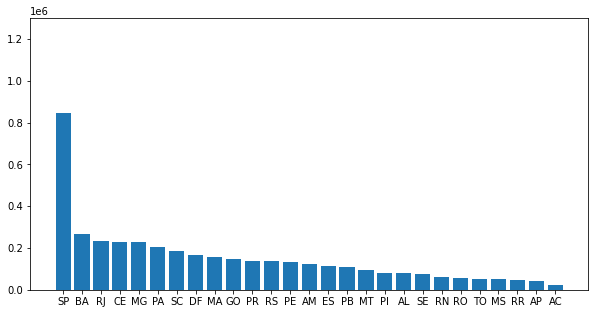

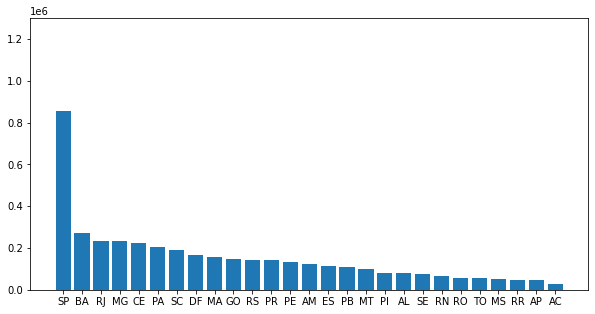

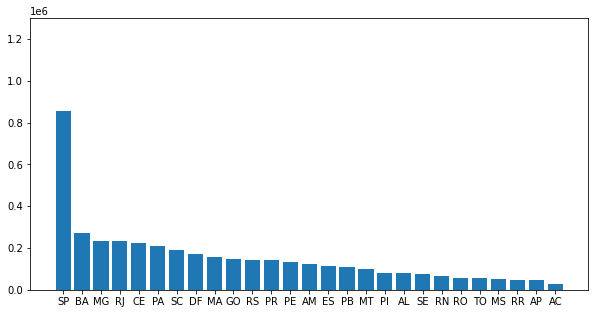

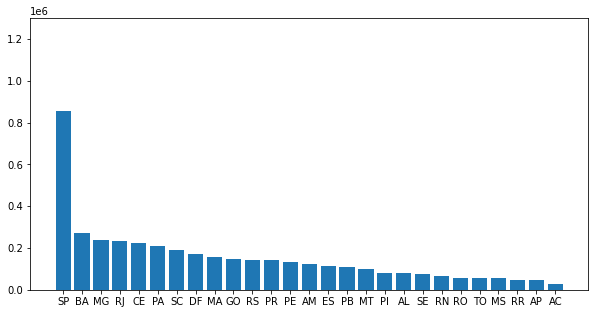

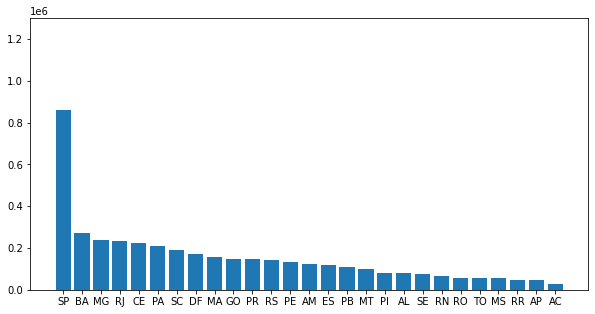

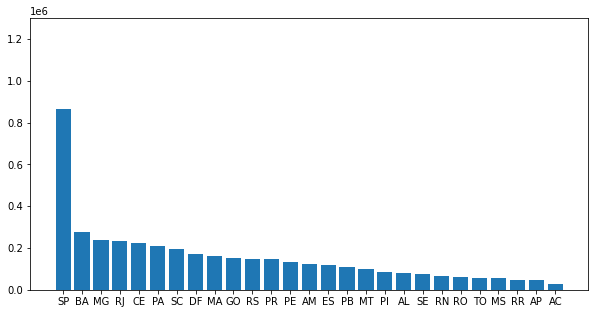

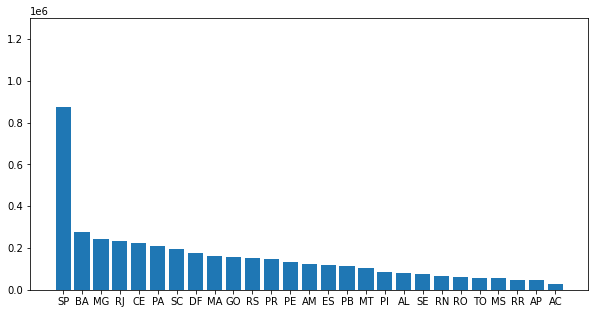

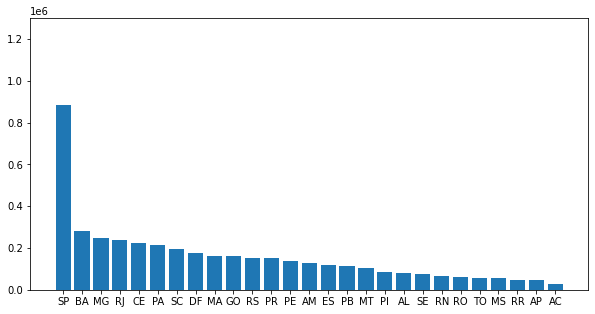

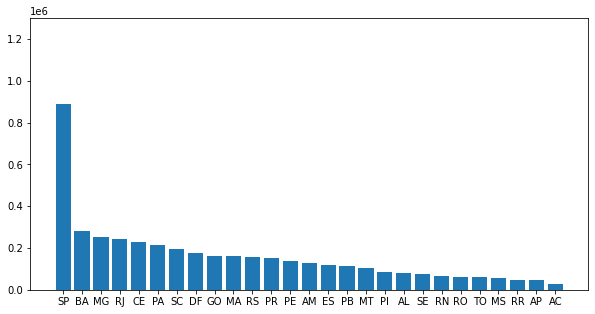

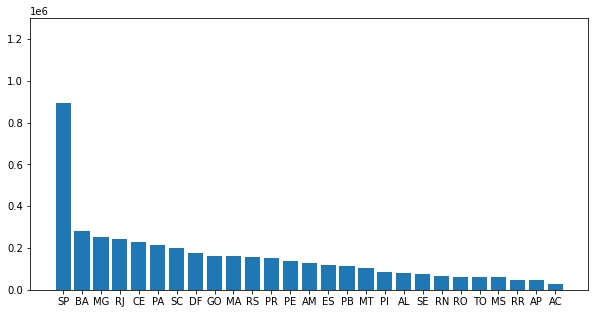

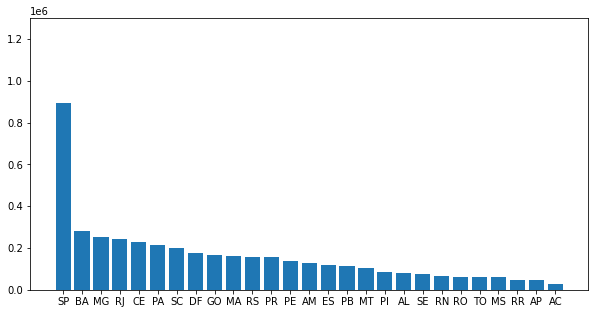

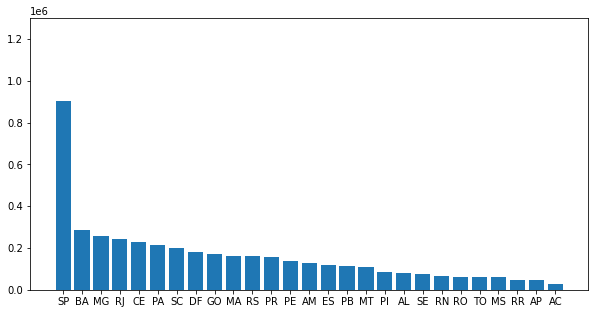

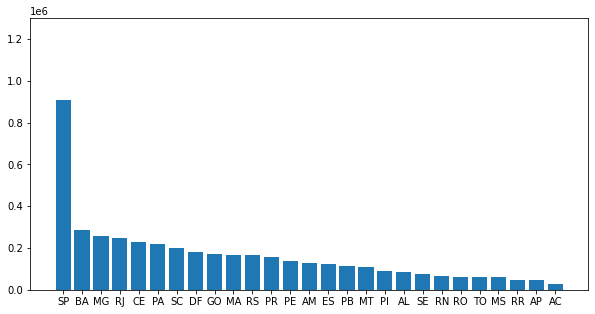

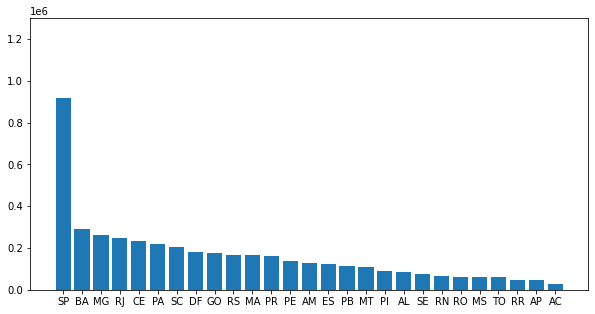

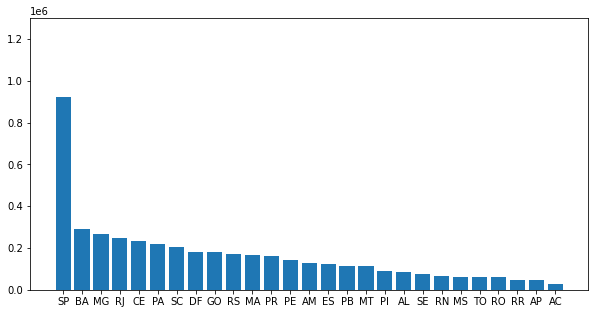

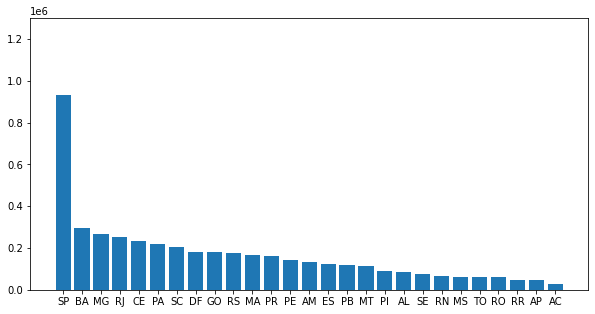

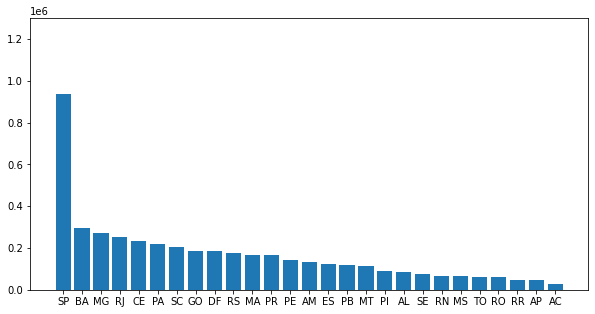

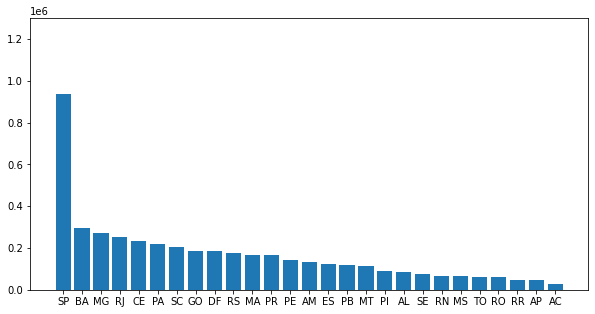

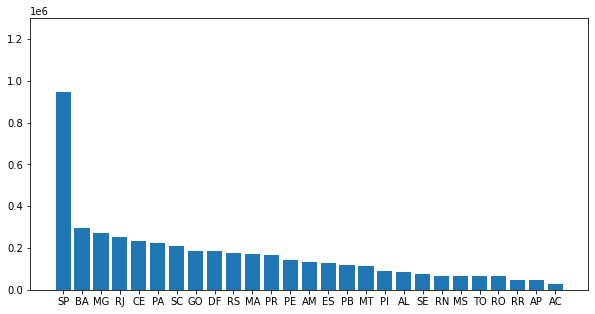

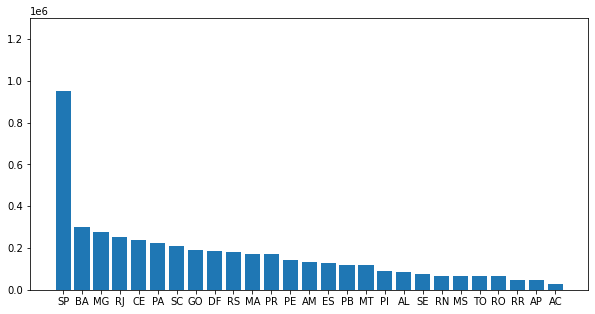

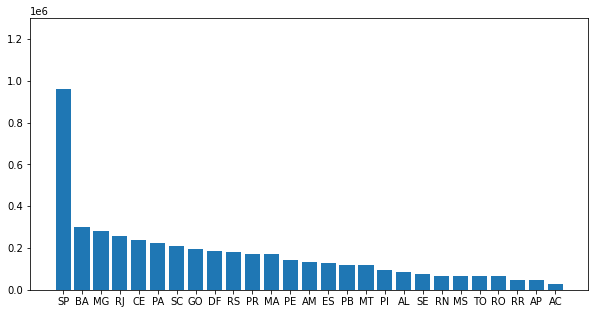

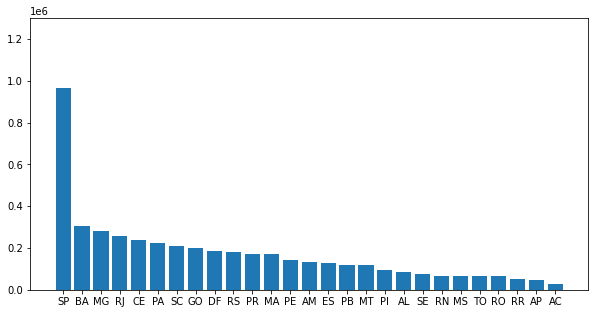

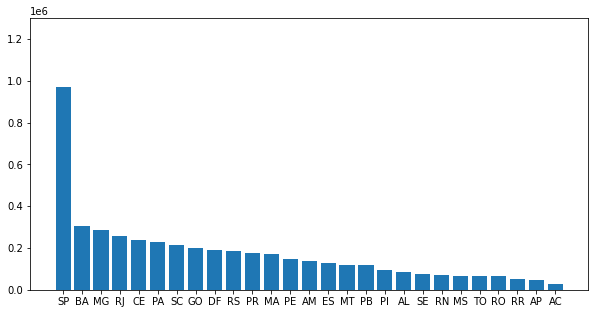

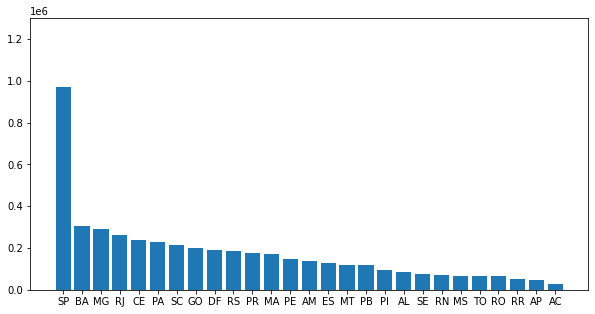

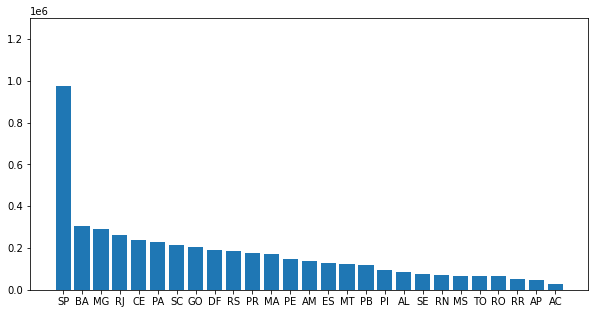

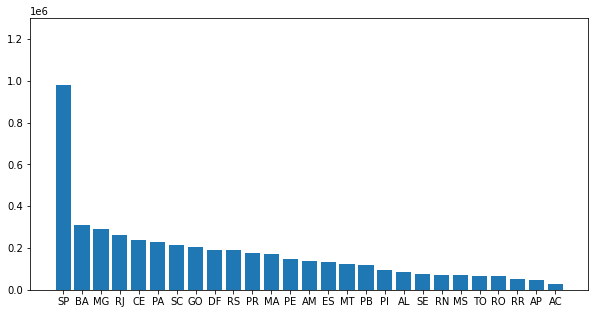

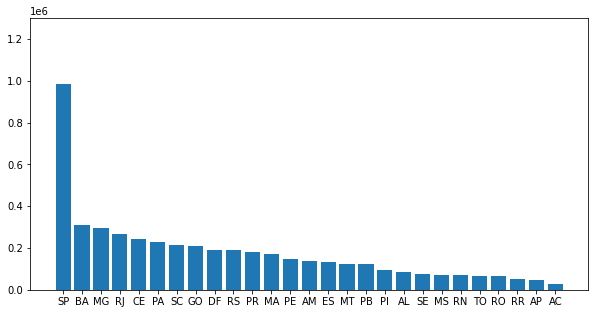

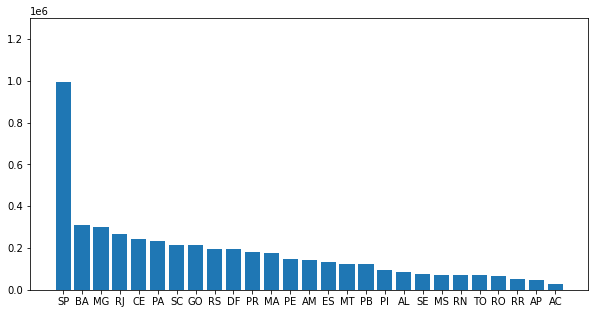

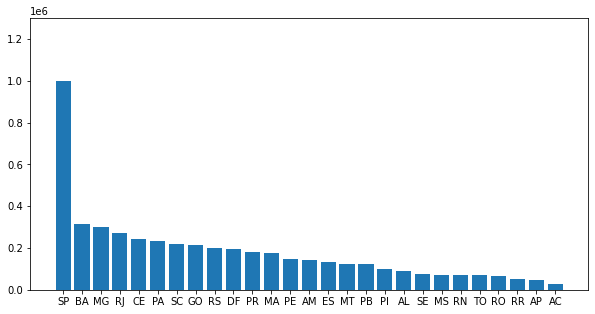

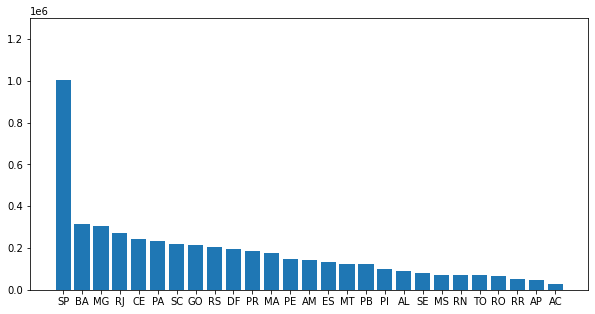

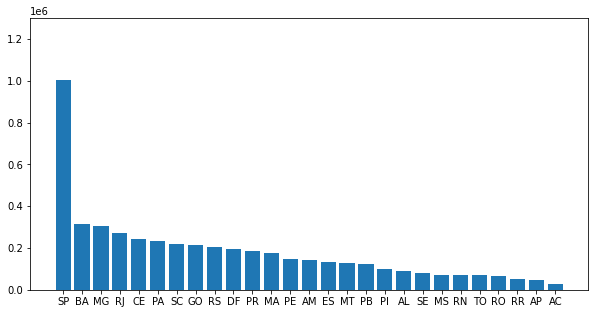

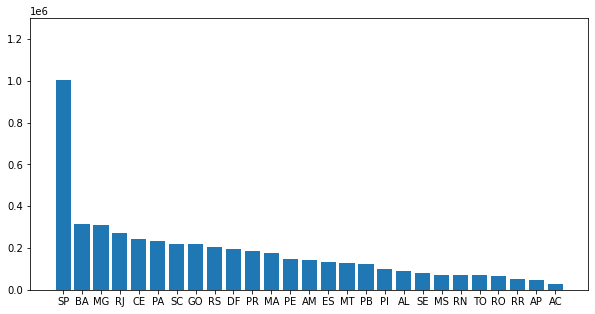

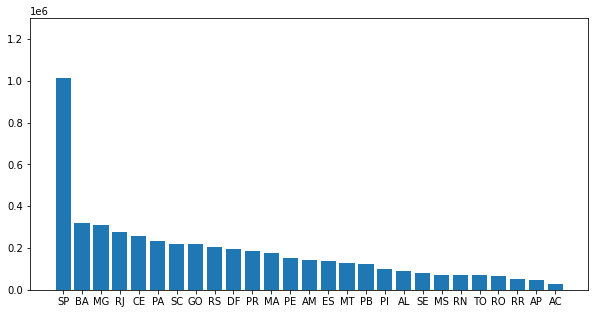

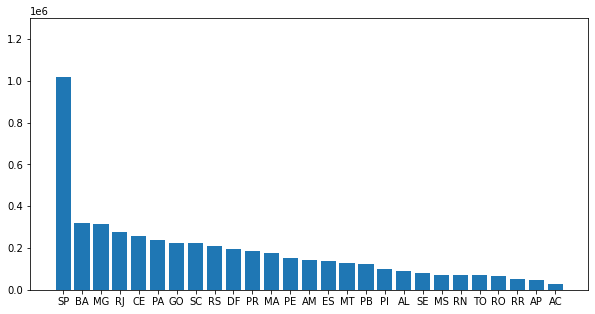

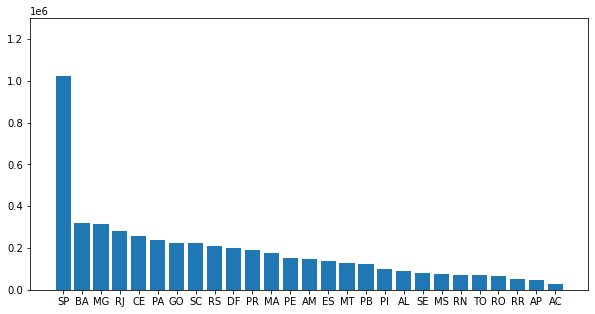

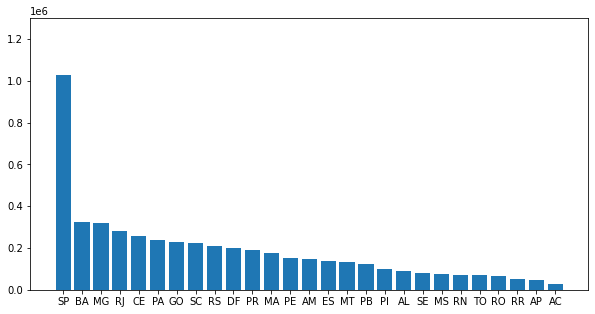

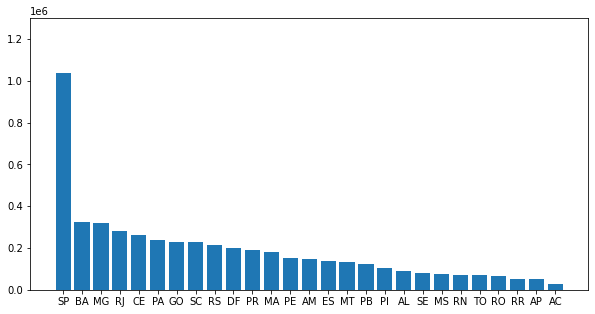

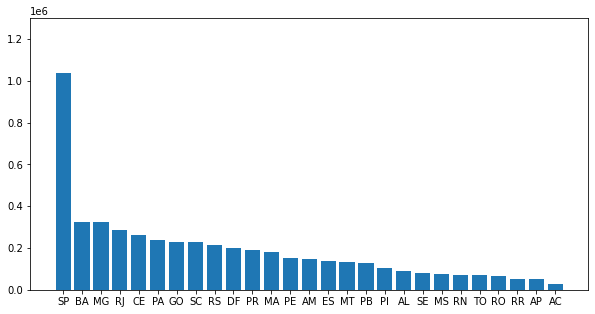

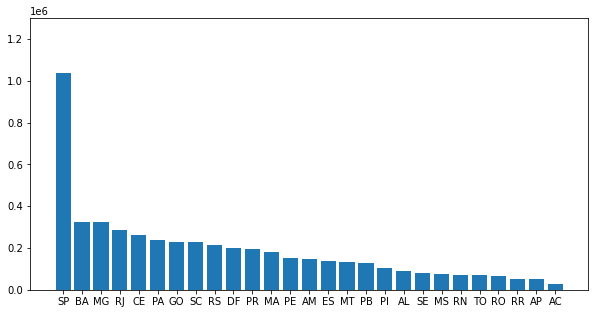

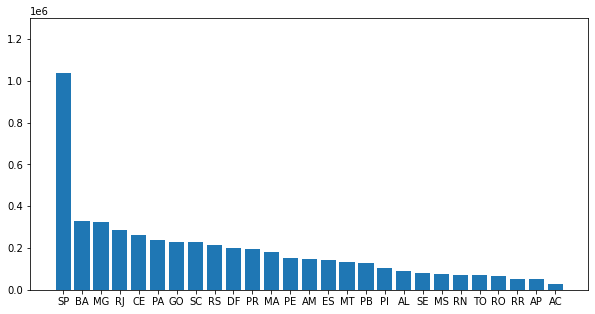

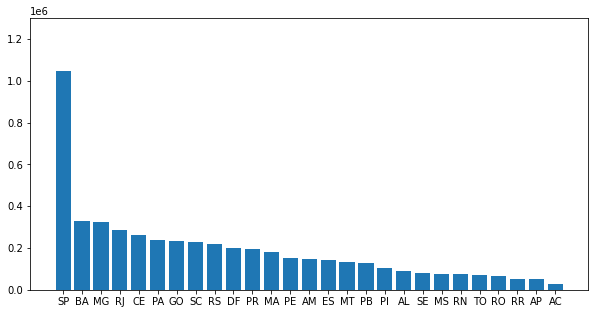

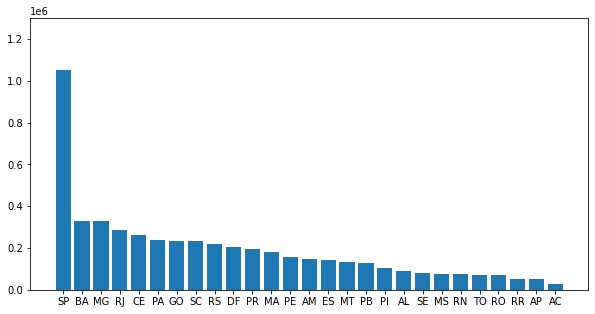

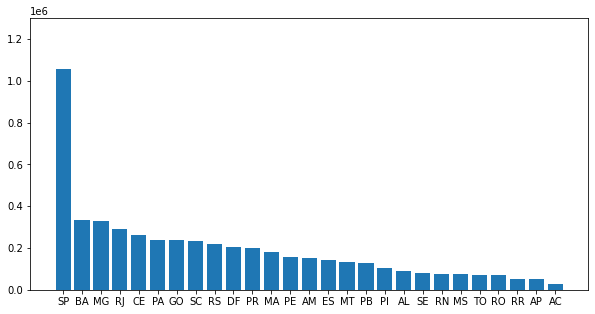

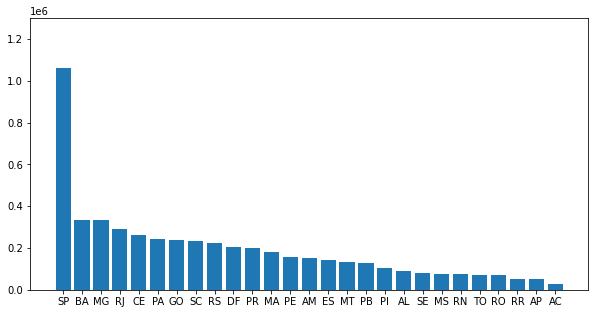

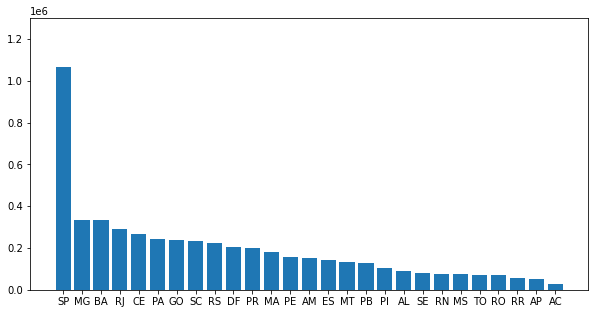

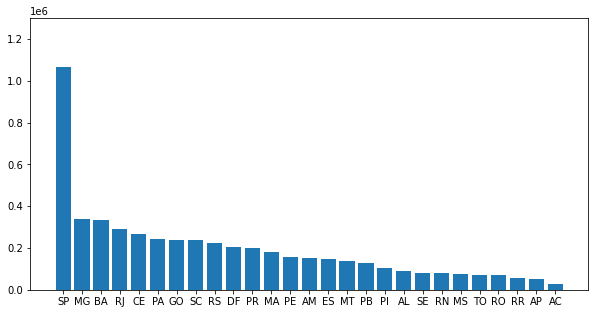

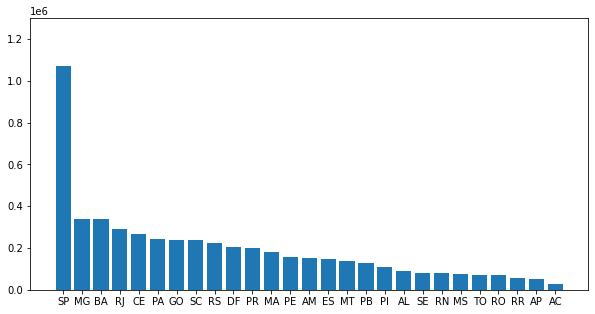

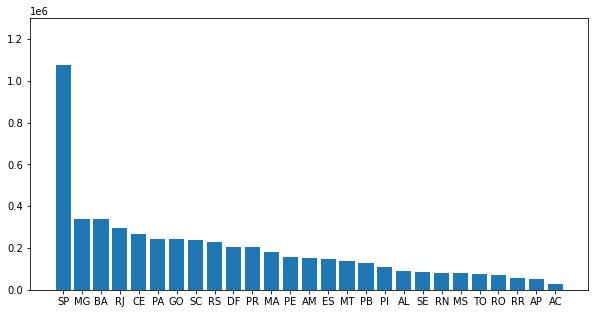

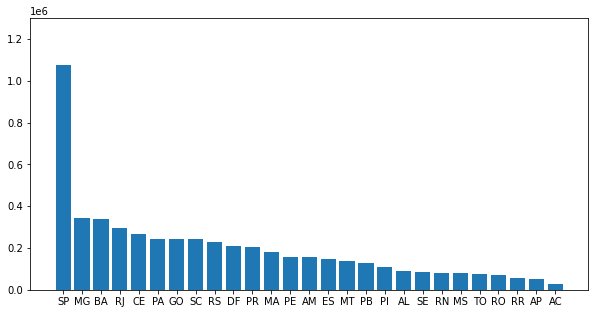

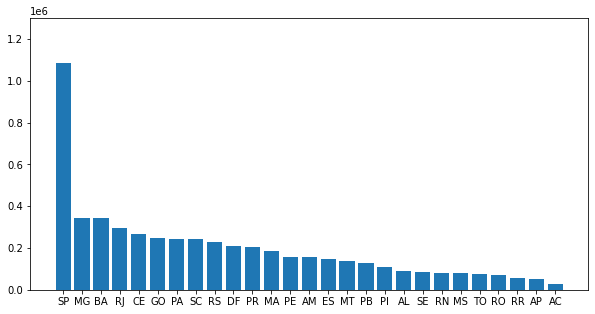

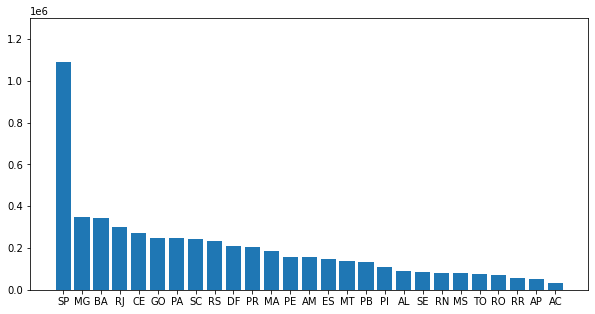

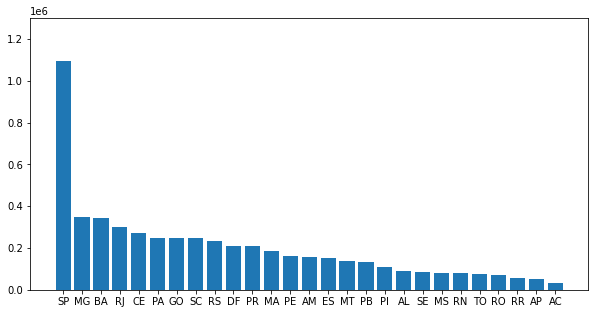

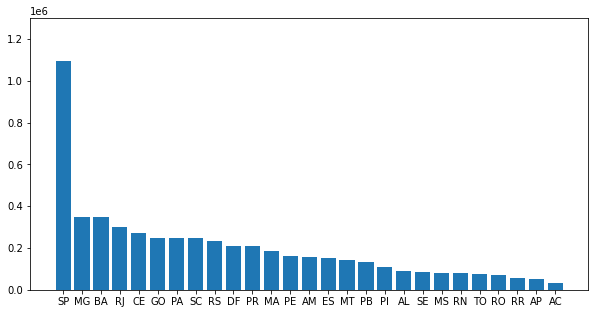

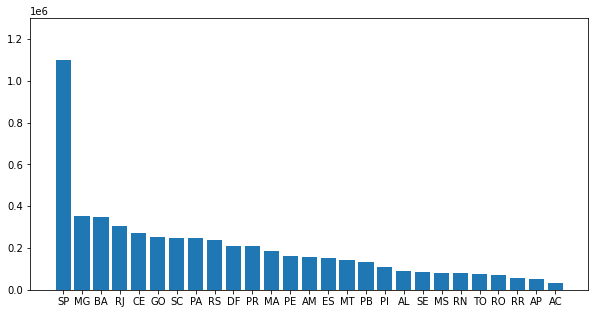

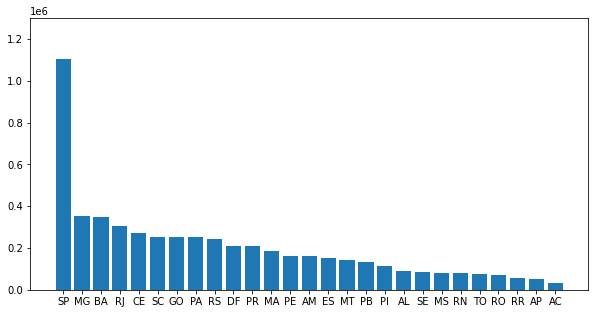

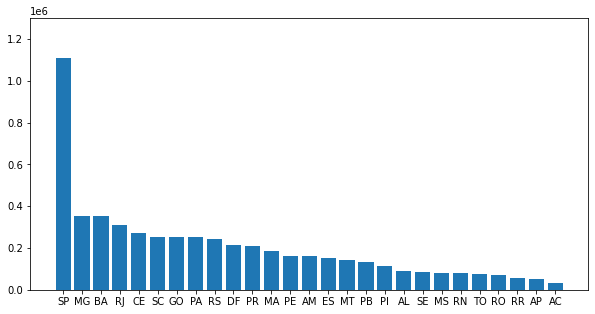

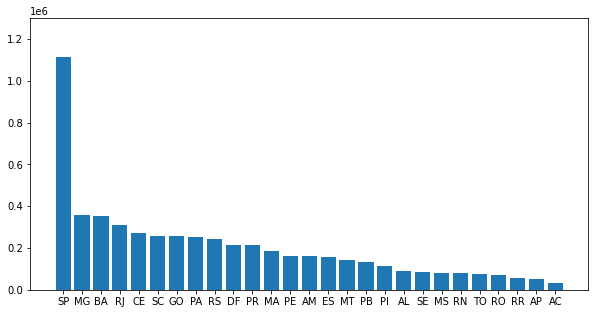

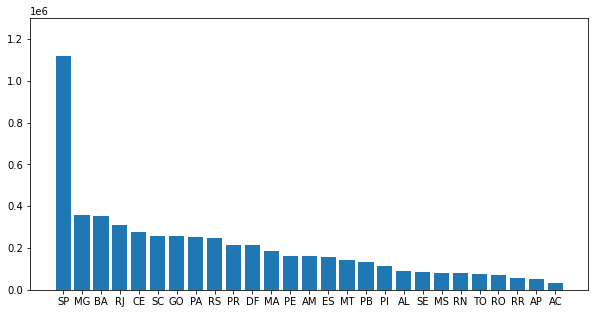

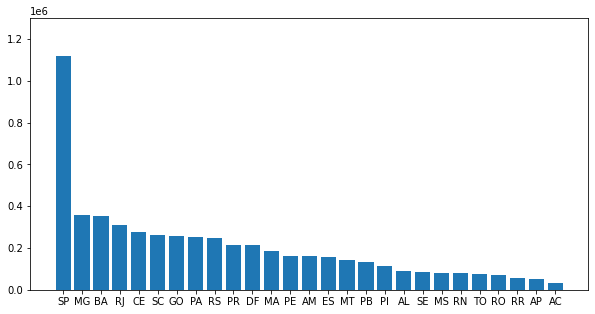

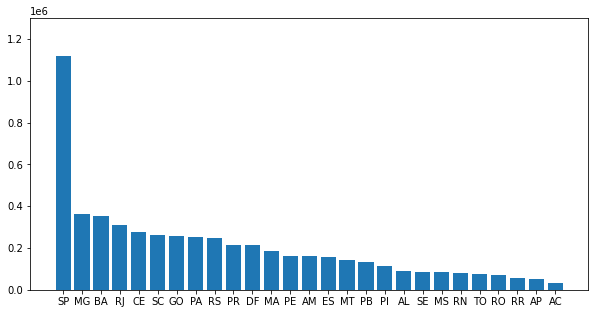

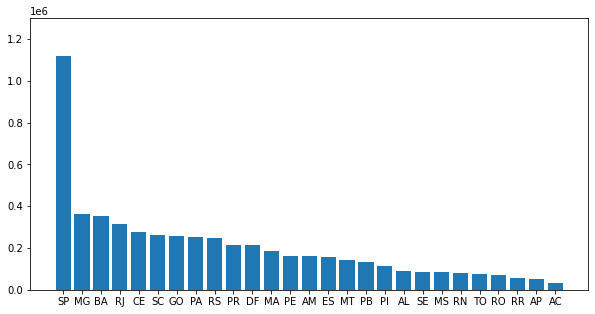

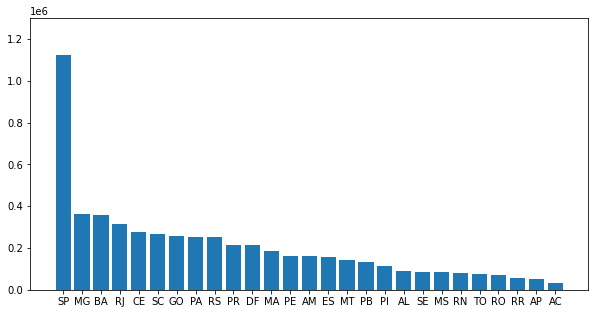

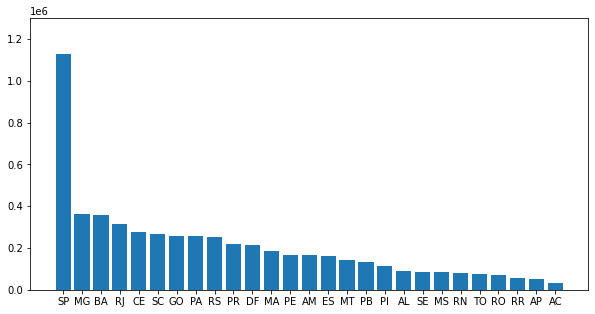

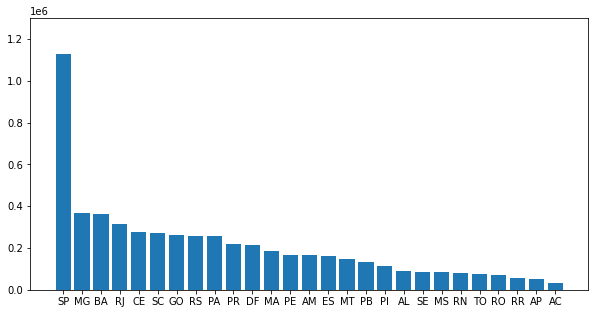

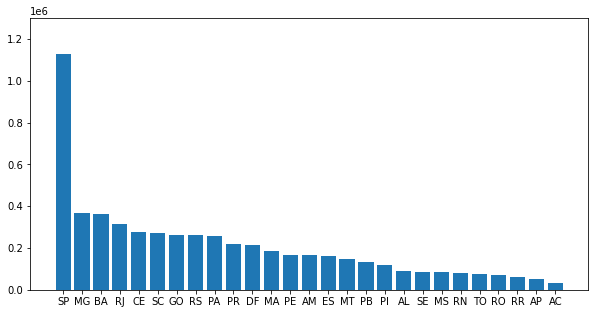

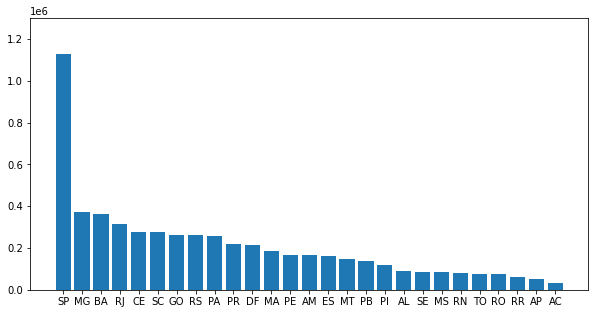

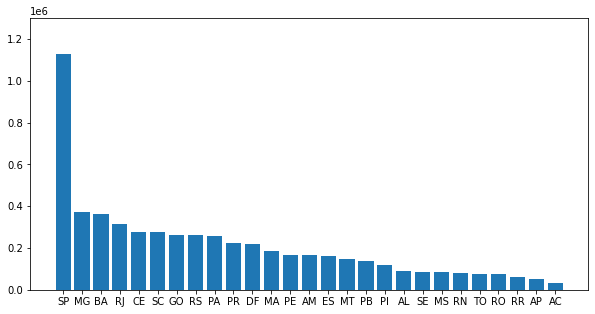

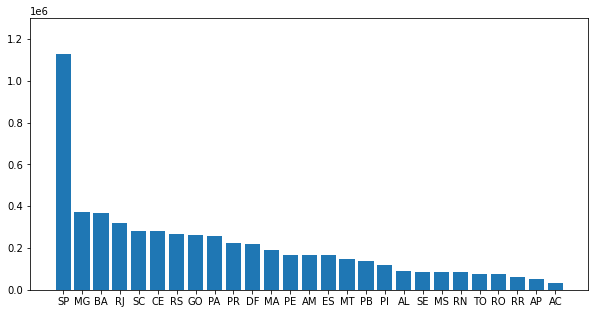

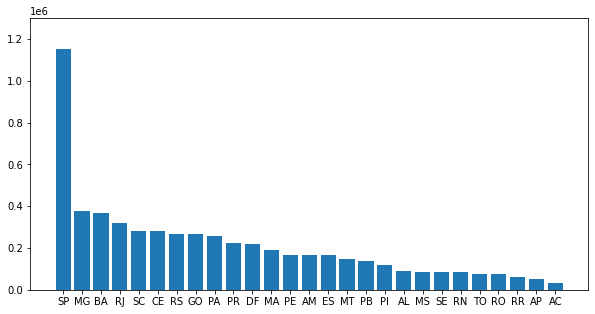

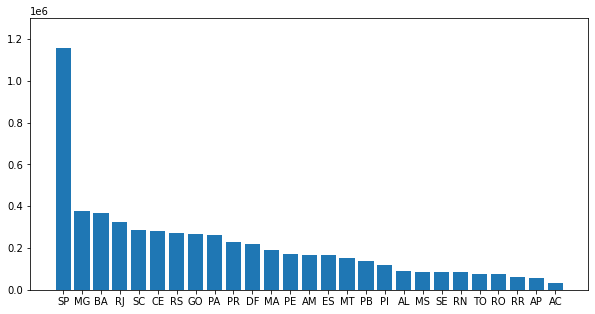

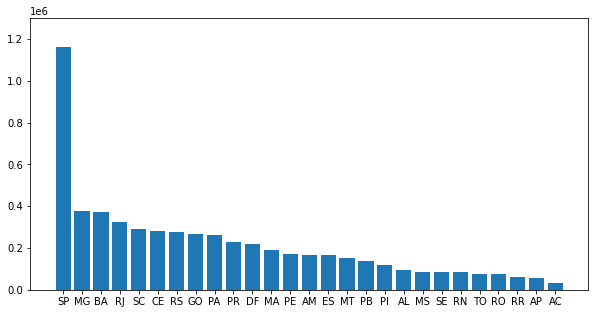

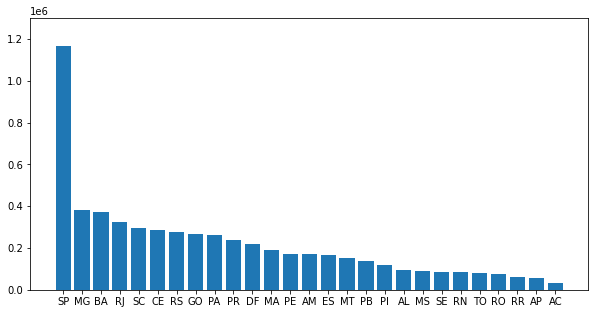

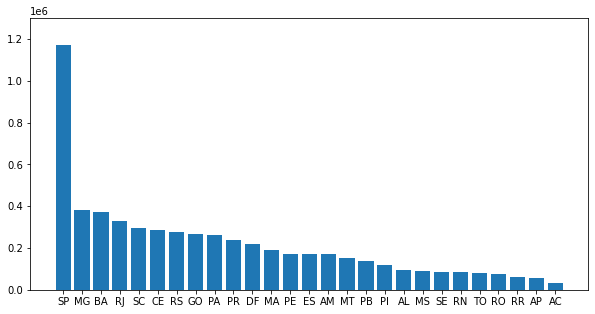

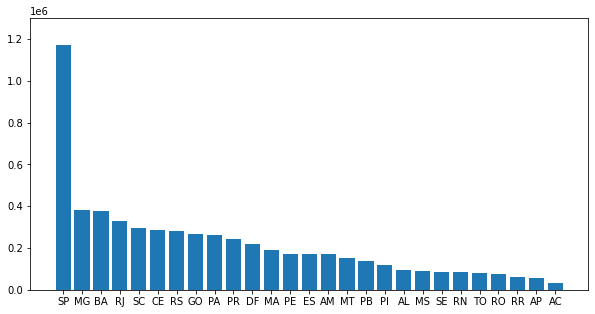

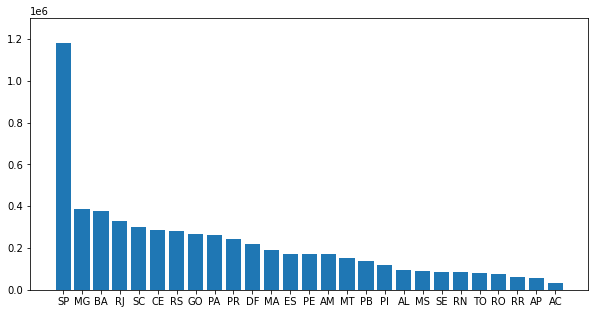

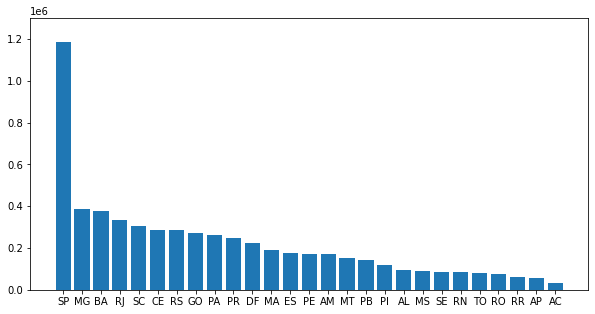

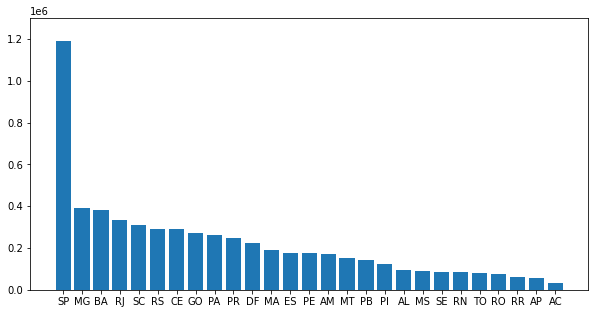

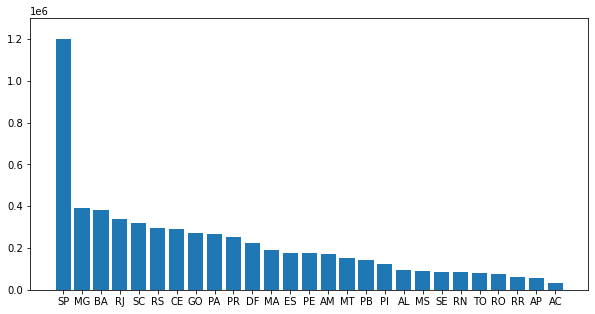

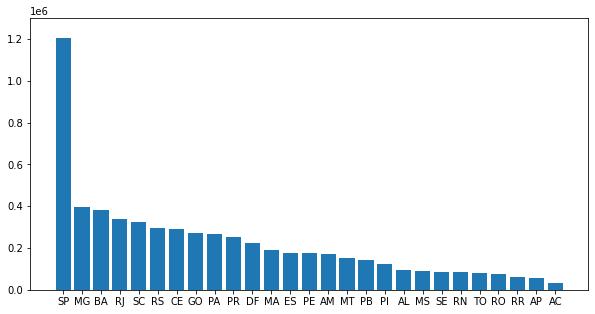

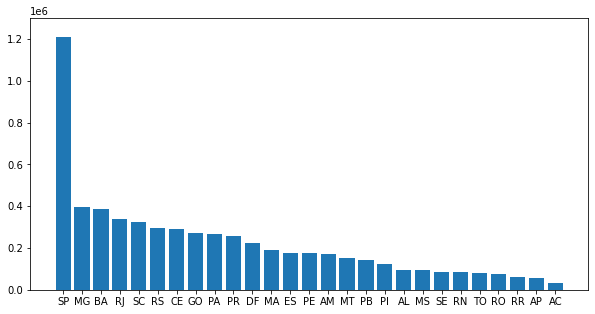

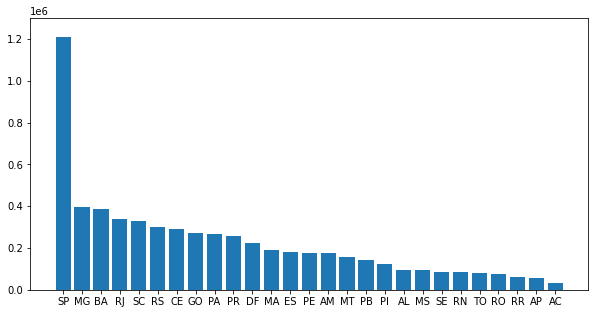

In [10]:
index = 0
data = dados_completos["data"][27*index]
ultima_data = dados_completos["data"].iloc[-1]

low = 0
high = 1.3e6

while data != ultima_data:
    dados_dia = dados_completos.query(f"data == '{data}'")
    dados_dia = dados_dia.sort_values("casos", ascending=False)
    dia_mes = data[:2] + "/" + data[3:5] + "/" + data[6:]
#     mapa = gera_mapa(dados_dia, dia_mes)
#     mapa.write_image(f"mapas/{index}.png")
    estados = list(dados_dia["estado"])
    casos = list(dados_dia["casos"])
    
    fig = plt.figure(figsize=(10,5))
    plt.ylim([low, high])
    # plt.bar(estados, casos)
    # plt.savefig(f"graficos/{index}.png")
    
    index += 1
    data = dados_completos["data"][27*index]


    

In [12]:
ultima_data = dados_completos["data"].iloc[-1]
gera_mapa(dados_completos.query(f"data == '{ultima_data}'"),"23-11-2020")